In [17]:
import uproot
import awkward as ak
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import os, glob, pickle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
from matplotlib.colors import LinearSegmentedColormap
# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

### Physical samples

In [18]:
# file = uproot.open("data/GenInfo_only_90.root")
file = uproot.open("../analysis_run3/GenInfo_ATo2Tau/CMSSW_13_0_17/src/Gen/Ntuples/Combined_GenInfo_only_A_2Tau_m3p6To18_pT30To300_v2_unbiased.root")
RHTree = file["fevt/RHTree"]

In [19]:
# RHTree.keys()
# RHTree.typenames()
# RHTree.show()

In [20]:
# out_dir='data/plot_H_AA_4Tau_M_10_signal_kinematics'
out_dir='AN_Note_Plot'
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)
save = True

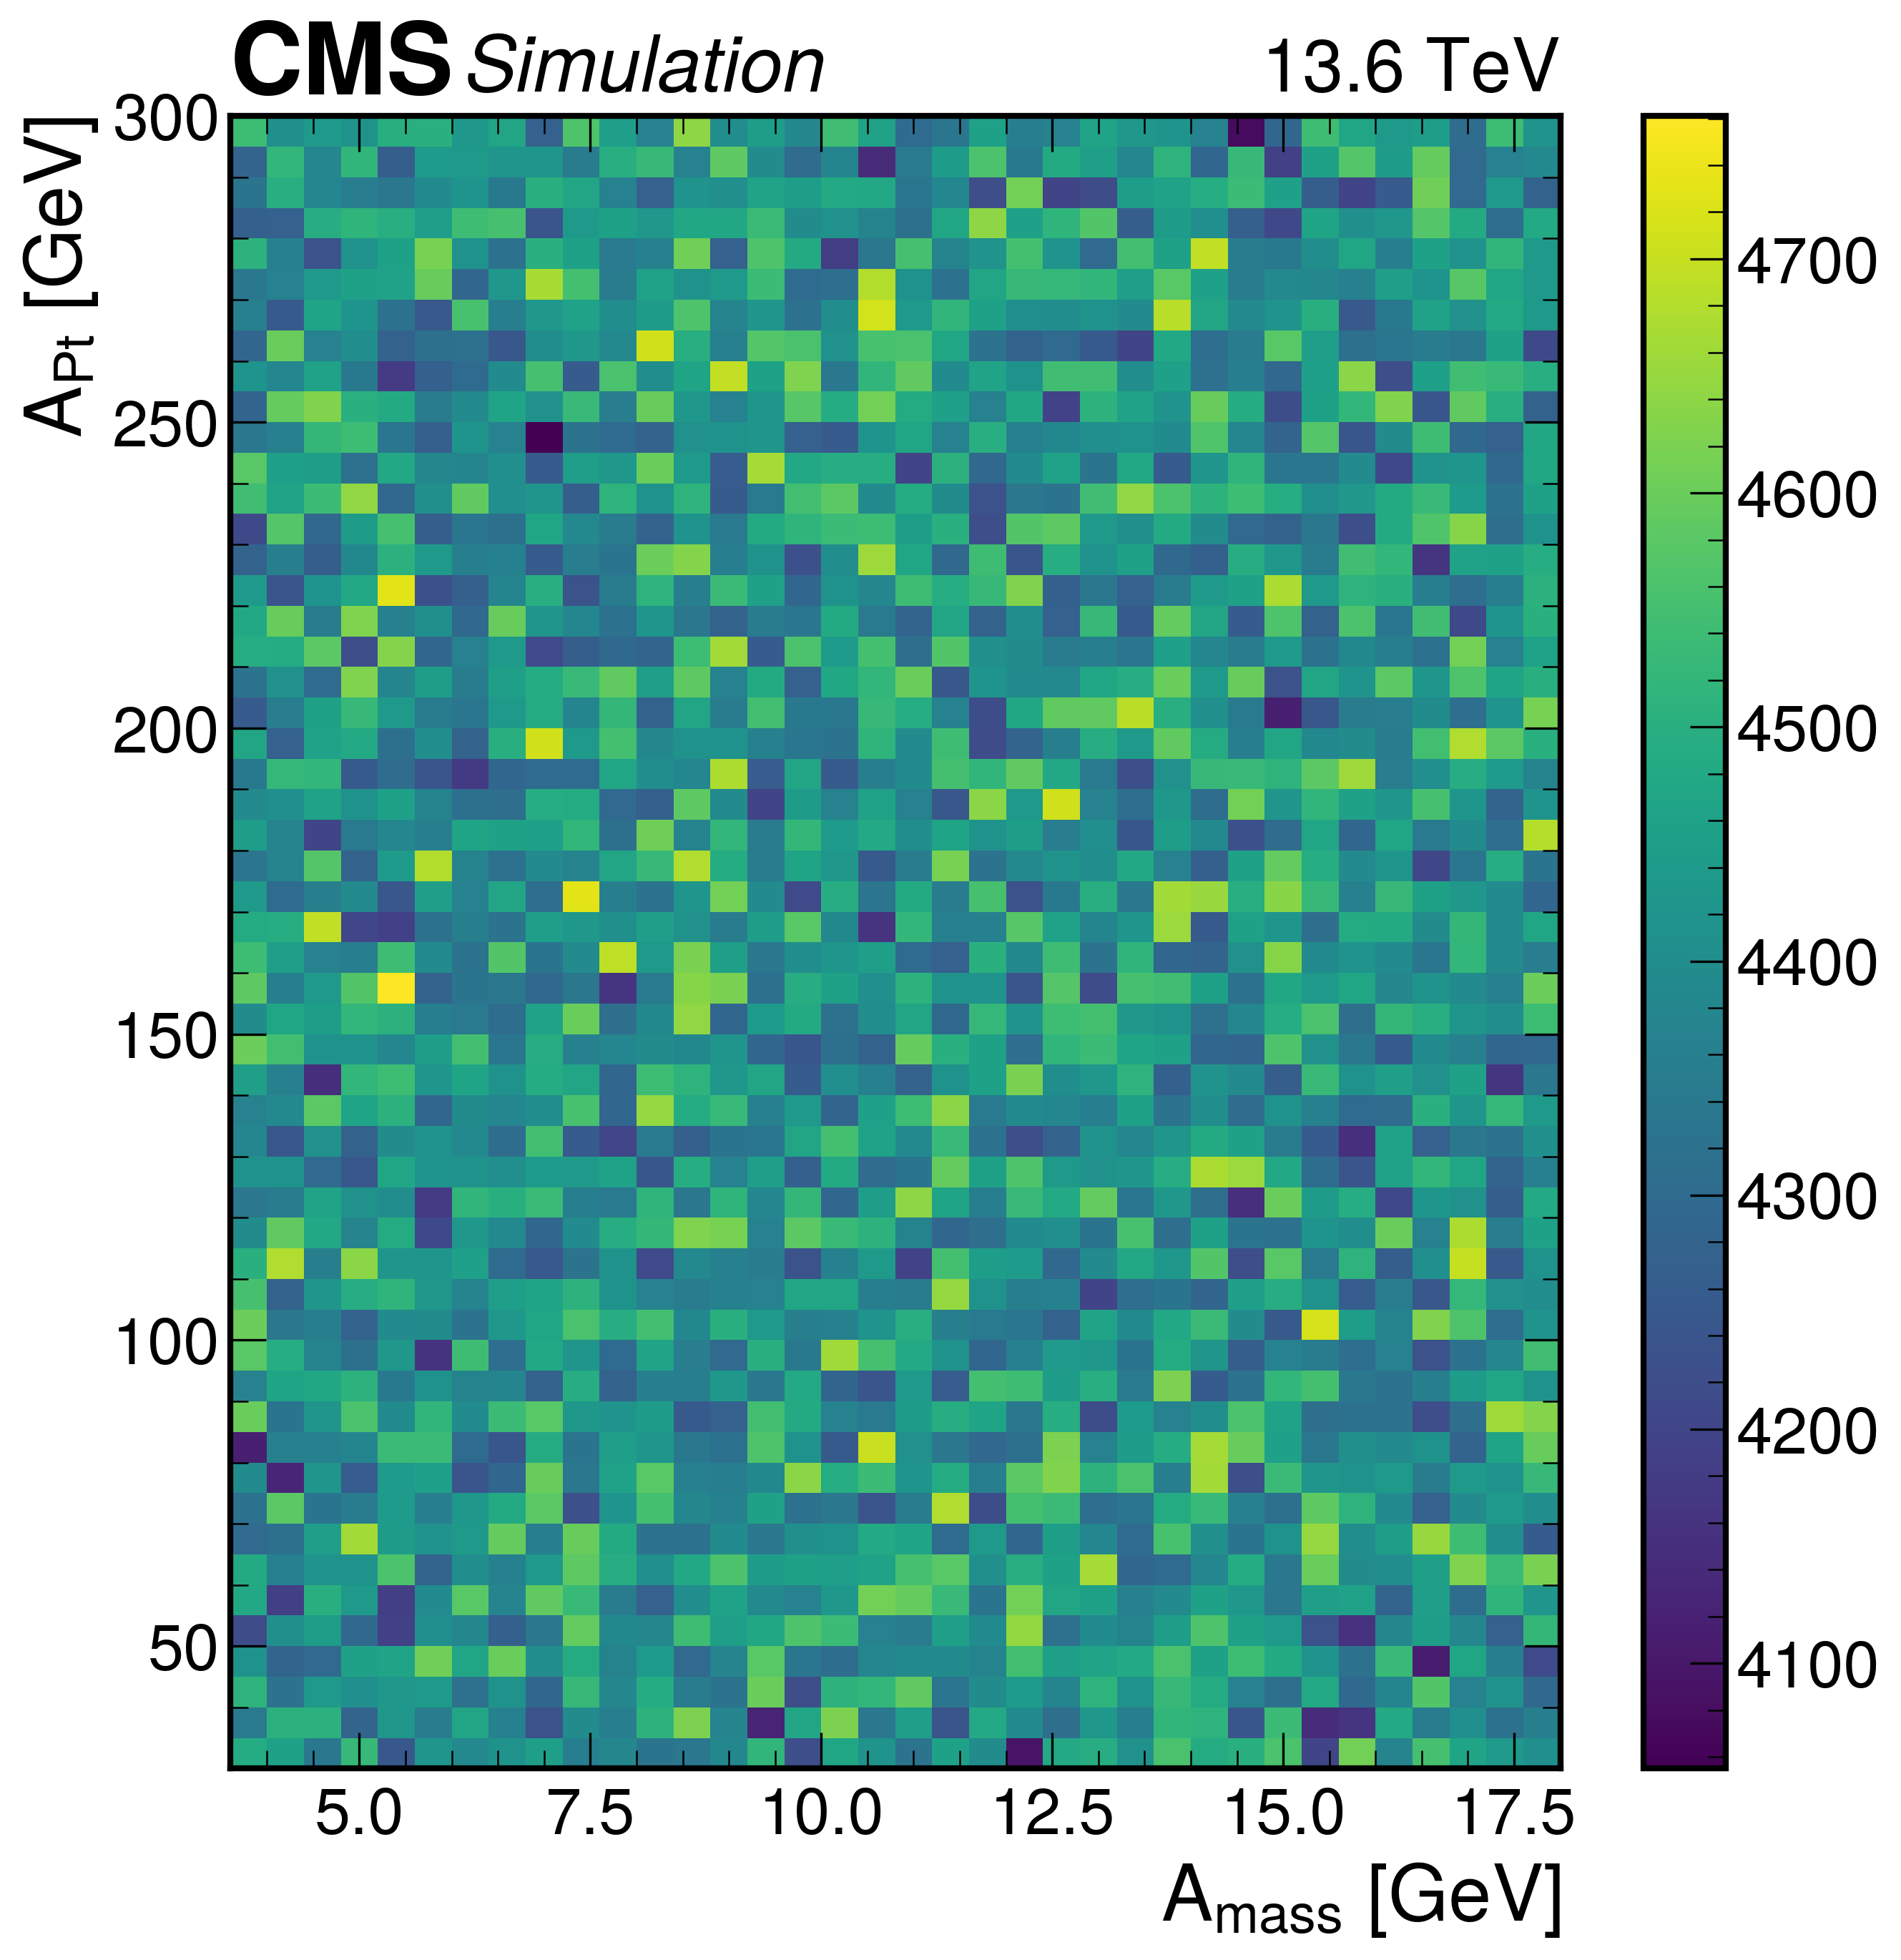

In [25]:
A1_pt = RHTree.arrays(["A1_pt"],"A1_pt > -111",library="pd")['A1_pt']
GenA1 = RHTree.arrays(["GenA1"],"GenA1 > -111",library="pd")['GenA1']

fig, ax = plt.subplots(dpi=300)
norm = mcolors.TwoSlopeNorm(vmin=1000, vmax = 5000, vcenter=3000)
counts, xedges, yedges, _ = plt.hist2d(GenA1, A1_pt, bins=[np.arange(3.6,18.1, .4), np.arange(30,301,5)])
plt.xlabel(r'${A_{mass}}$ [GeV]')
plt.ylabel(r'${A_{Pt}}$ [GeV]')
plt.colorbar().set_label(label='' )
# plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'{out_dir}/mass_reg_biasing_plot_original.pdf', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show() 
# print(counts)

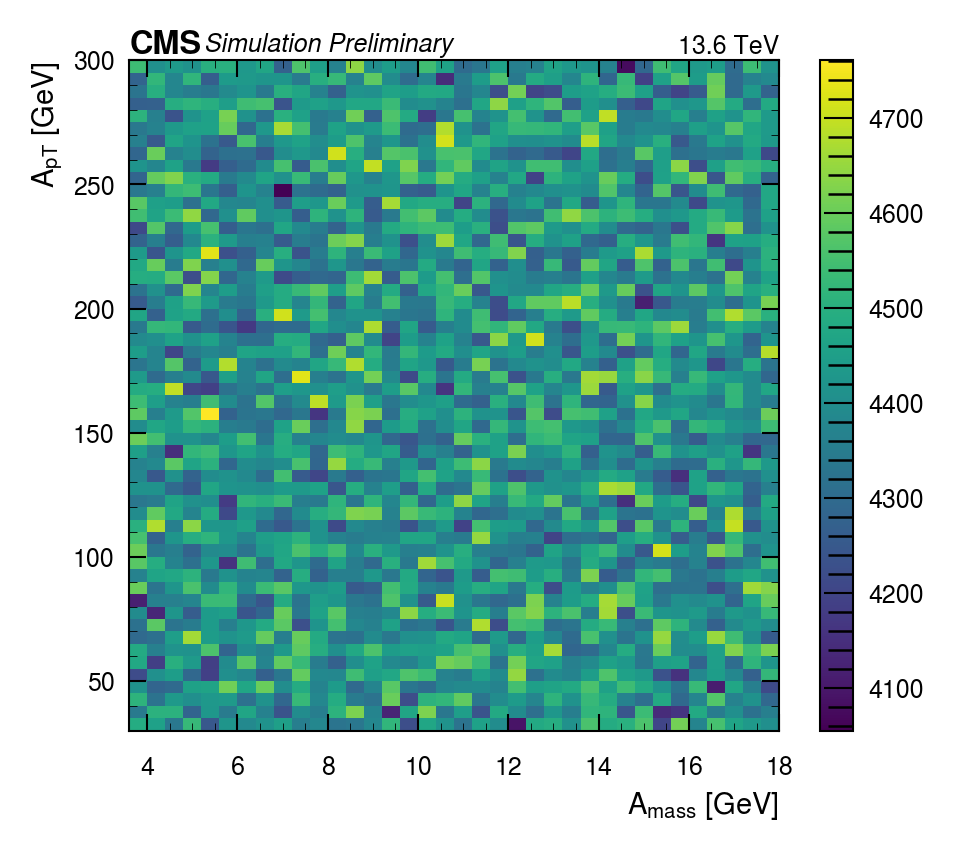

In [8]:
fig, ax = plt.subplots(figsize=(3.4,3), dpi=300)
norm = mcolors.TwoSlopeNorm(vmin=4000, vmax = 5000, vcenter=4500)
counts, xedges, yedges, _ = plt.hist2d(GenA1, A1_pt, bins=[np.arange(3.6,18.1, .4), np.arange(30,301,5)])

ax.tick_params(
    axis='both',
    which='major',
    labelsize=6,    # smaller tick labels
    length=4,       # shorter tick lines
    width=0.5       # thinner tick lines
)
ax.tick_params(
    axis='both',
    which='minor',
    labelsize=5,
    length=2,
    width=0.2
)

plt.xlabel(r'$A_{{mass}}$ [GeV]', size=7, labelpad=2)
plt.ylabel(r'$A_{pT}$ [GeV]', size=7, labelpad=2)


# plt.colorbar()
cb = plt.colorbar()
cb.set_label(label='', size=6)
cb.ax.tick_params(labelsize=6, length=7, width=0.5)

# plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
# hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
hep.cms.text("Simulation Preliminary", ax=ax, fontsize=6, loc=0)
ax.text(1, 1.01, "13.6 TeV", transform=ax.transAxes, fontsize=6, ha="right")
for spine in ax.spines.values():
    spine.set_linewidth(0.5)

# plt.rcParams.update({
# "text.usetex": True,
# "font.family": "serif",
# "font.size": 9
# })


# Thin the colorbar border
for spine in cb.ax.spines.values():
    spine.set_linewidth(0.5)  # or even 0.2 to match your main plot
plt.tight_layout(pad=0.5)
plt.savefig(f'{out_dir}/mass_reg_biasing_plot_original.jpeg', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show() 

keys-- <KeysViewHDF5 ['all_jet', 'am', 'apt', 'ieta', 'iphi', 'jetpt', 'm0', 'taudR']>
[17.24241    8.139154  15.228695  ...  6.7395277 11.168269   4.448727 ]


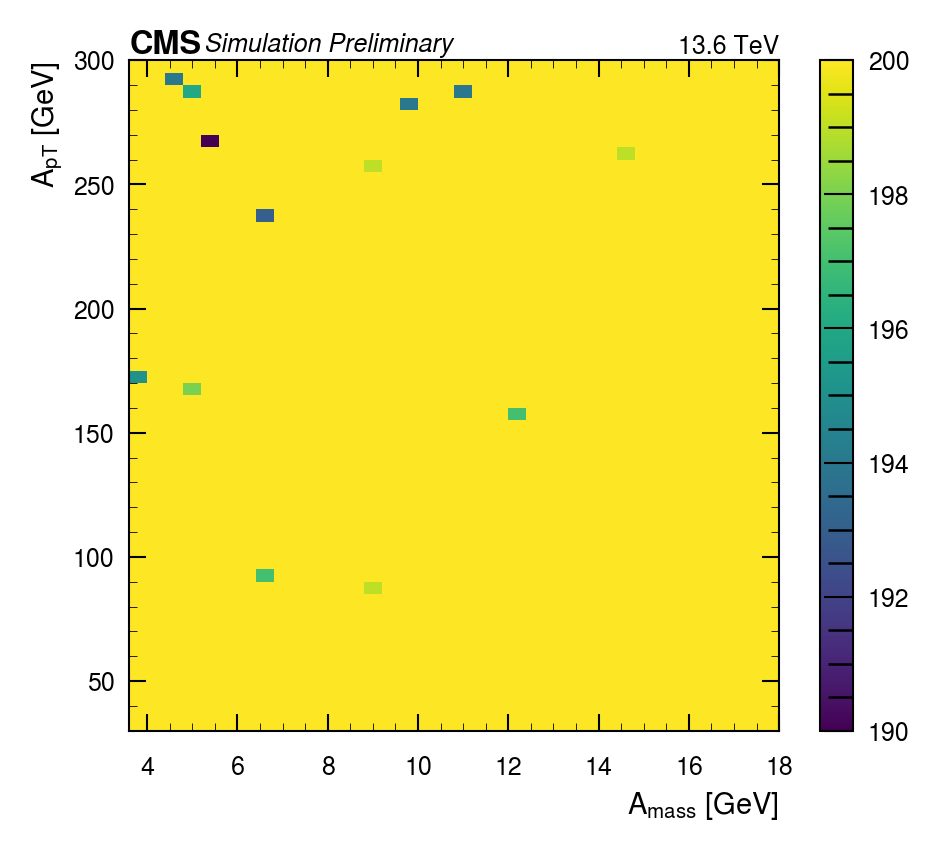

In [40]:
import h5py
infile = "../analysis_run3/IMG_aToTauTau_Hadronic_m3p6To18_pt30T0300_unbiased_combined_valid.h5"
data = h5py.File(infile, 'r')
print("keys--", data.keys())
        

A_mass = data["am"][:].flatten()
A_pt = data["apt"][:].flatten()
TaudR = data["taudR"][:].flatten()
# iphi_1 = data["iphi"][-1,:]
# m0_1 = data["m0"][-1,:]
print(A_mass)

fig, ax = plt.subplots(figsize=(3.4,3), dpi=300)
norm = mcolors.TwoSlopeNorm(vmin=4000, vmax = 5000, vcenter=4500)
counts, xedges, yedges, _ = plt.hist2d(A_mass, A_pt, bins=[np.arange(3.6,18.1, .4), np.arange(30,301,5)])

ax.tick_params(
    axis='both',
    which='major',
    labelsize=6,    # smaller tick labels
    length=4,       # shorter tick lines
    width=0.5       # thinner tick lines
)
ax.tick_params(
    axis='both',
    which='minor',
    labelsize=5,
    length=2,
    width=0.2
)

plt.xlabel(r'$A_{{mass}}$ [GeV]', size=7, labelpad=2)
plt.ylabel(r'$A_{pT}$ [GeV]', size=7, labelpad=2)


# plt.colorbar()
cb = plt.colorbar()
cb.set_label(label='', size=6)
cb.ax.tick_params(labelsize=6, length=7, width=0.5)

# plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
# hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
hep.cms.text("Simulation Preliminary", ax=ax, fontsize=6, loc=0)
ax.text(1, 1.01, "13.6 TeV", transform=ax.transAxes, fontsize=6, ha="right")
for spine in ax.spines.values():
    spine.set_linewidth(0.5)


# Thin the colorbar border
for spine in cb.ax.spines.values():
    spine.set_linewidth(0.5)  # or even 0.2 to match your main plot

plt.tight_layout(pad=0.5)
# plt.savefig(f'{out_dir}/mass_reg_biasing_plot_unbiased.jpeg', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show() 

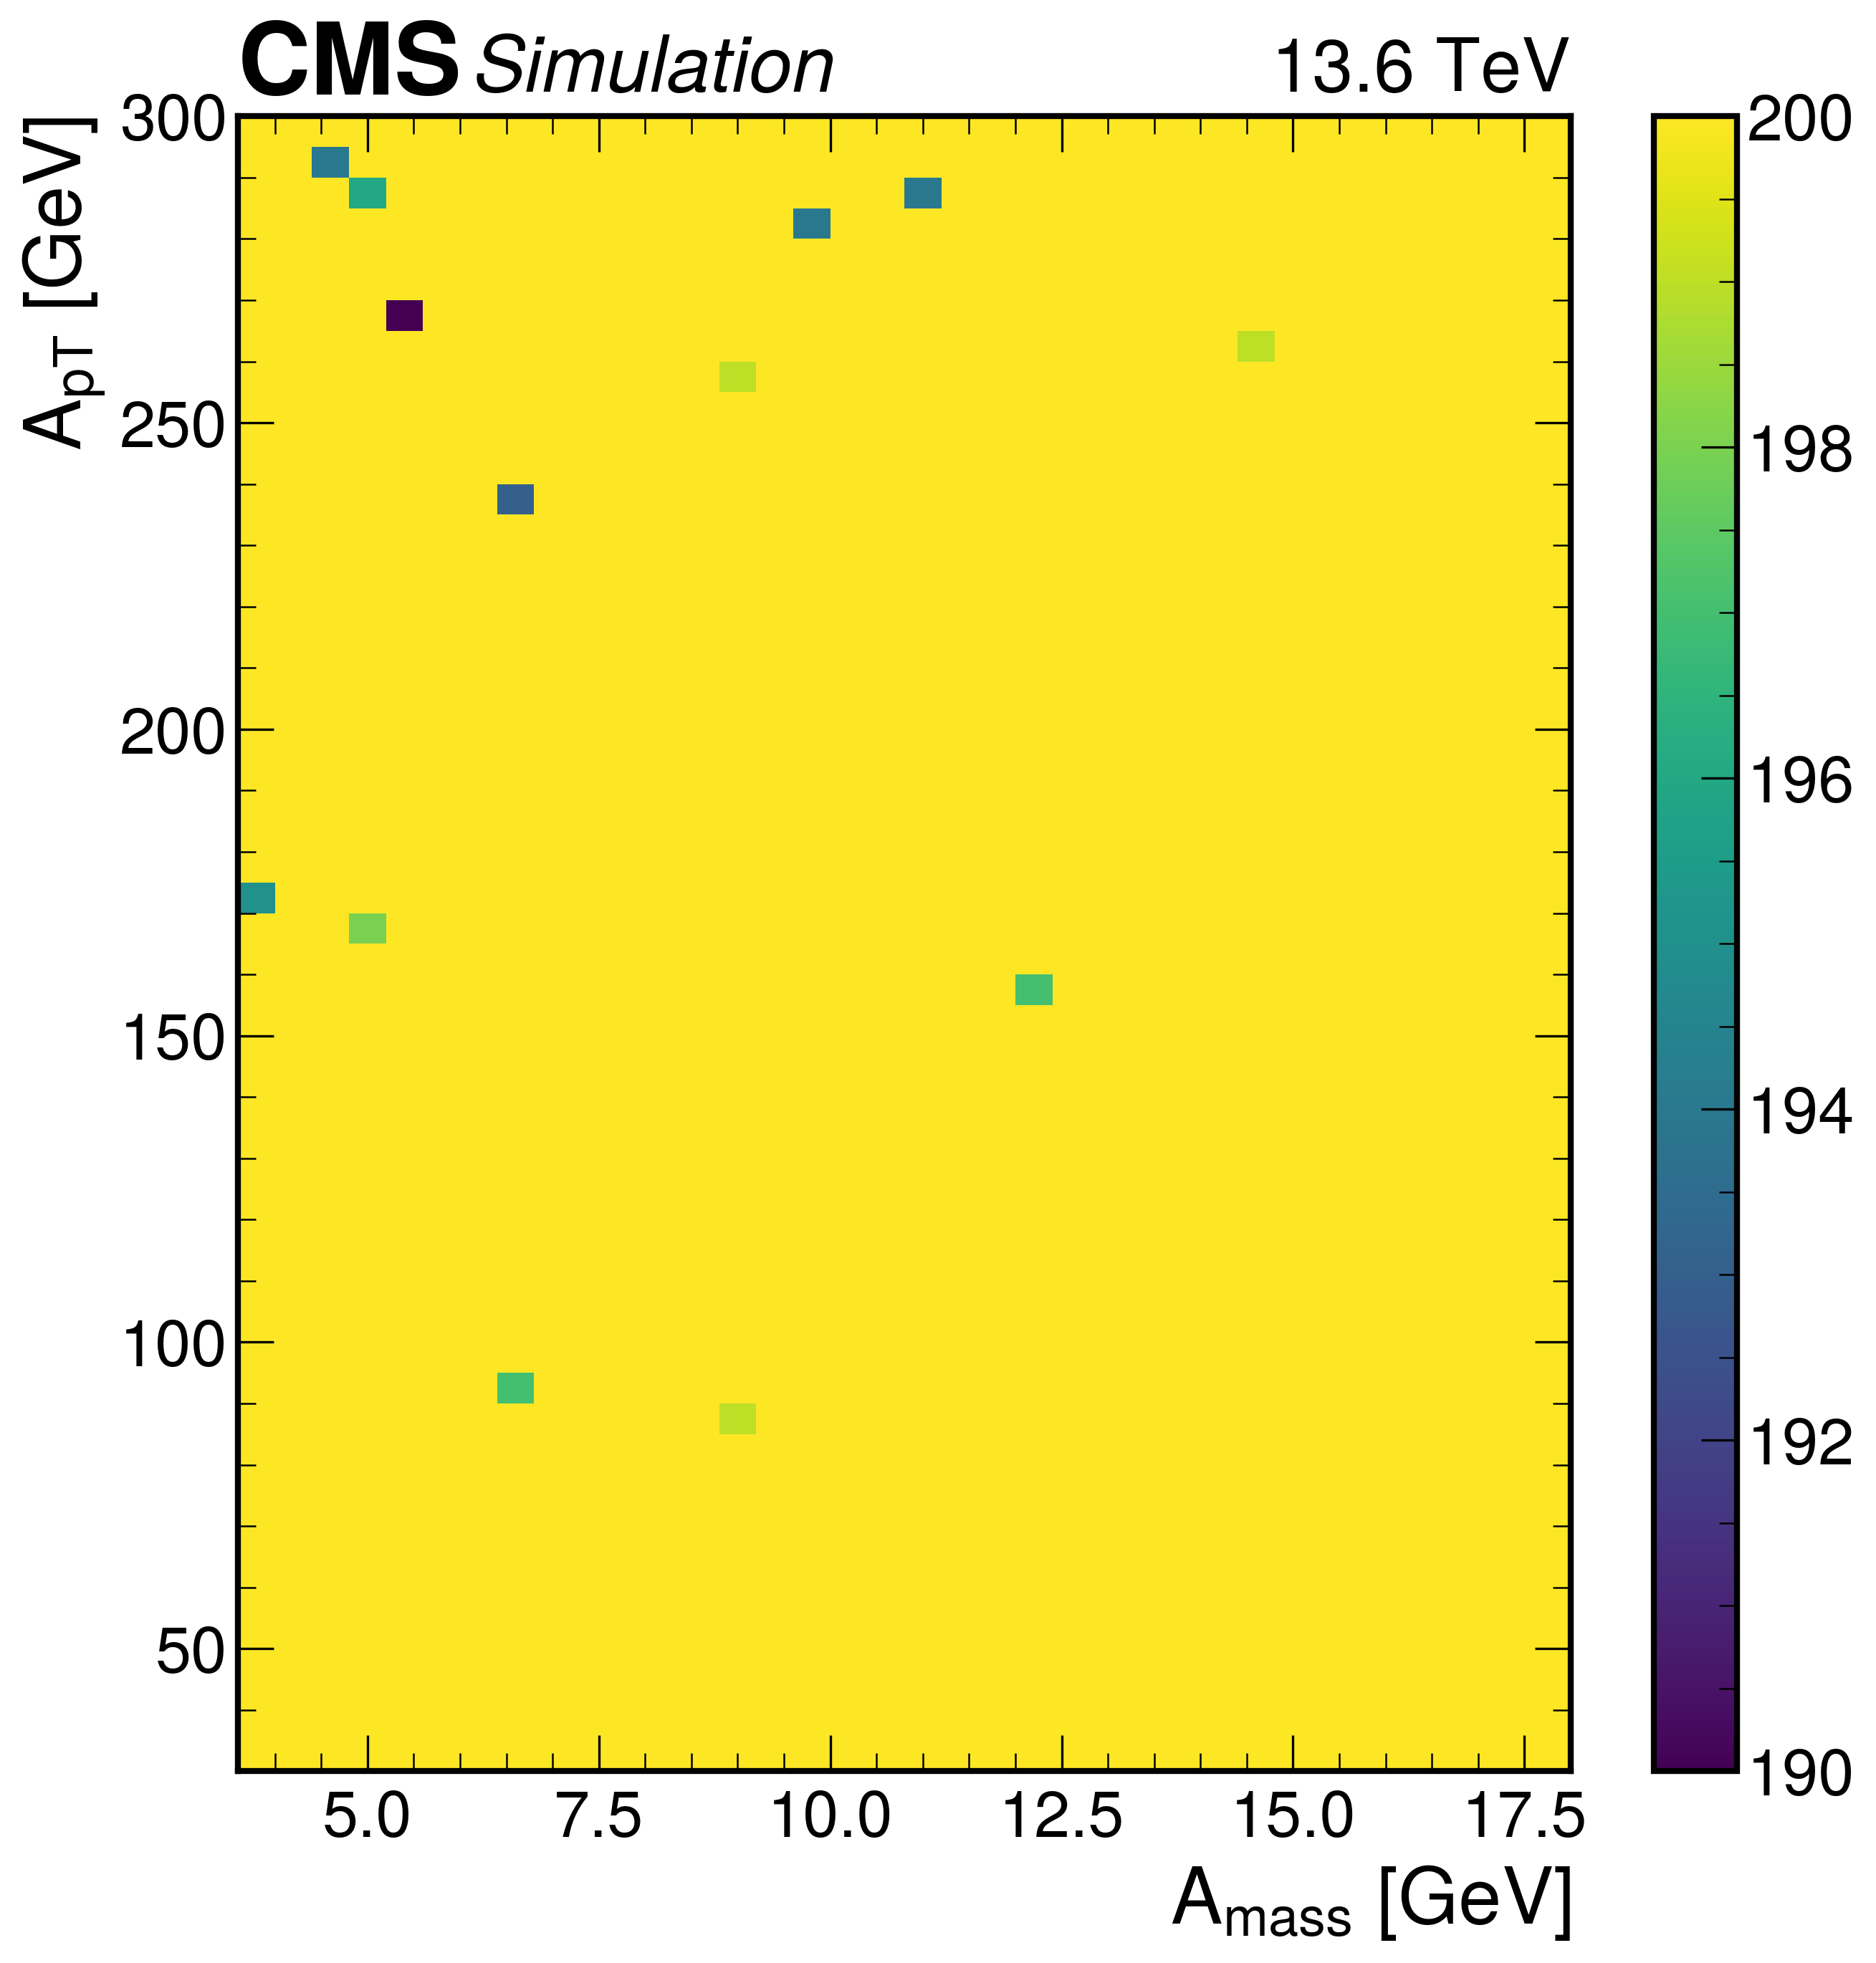

In [41]:
fig, ax = plt.subplots(dpi=300)
norm = mcolors.TwoSlopeNorm(vmin=0, vmax = 200, vcenter=100)
counts, xedges, yedges, _ = plt.hist2d(A_mass, A_pt, bins=[np.arange(3.6,18.1, .4), np.arange(30,301,5)])
plt.xlabel(r'${A_{mass}}$ [GeV]')
plt.ylabel(r'$A_{Pt}$ [GeV]')
# plt.colorbar()
plt.colorbar().set_label(label='' )
# plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'{out_dir}/mass_reg_biasing_plot_unbiased.jpeg', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show() 

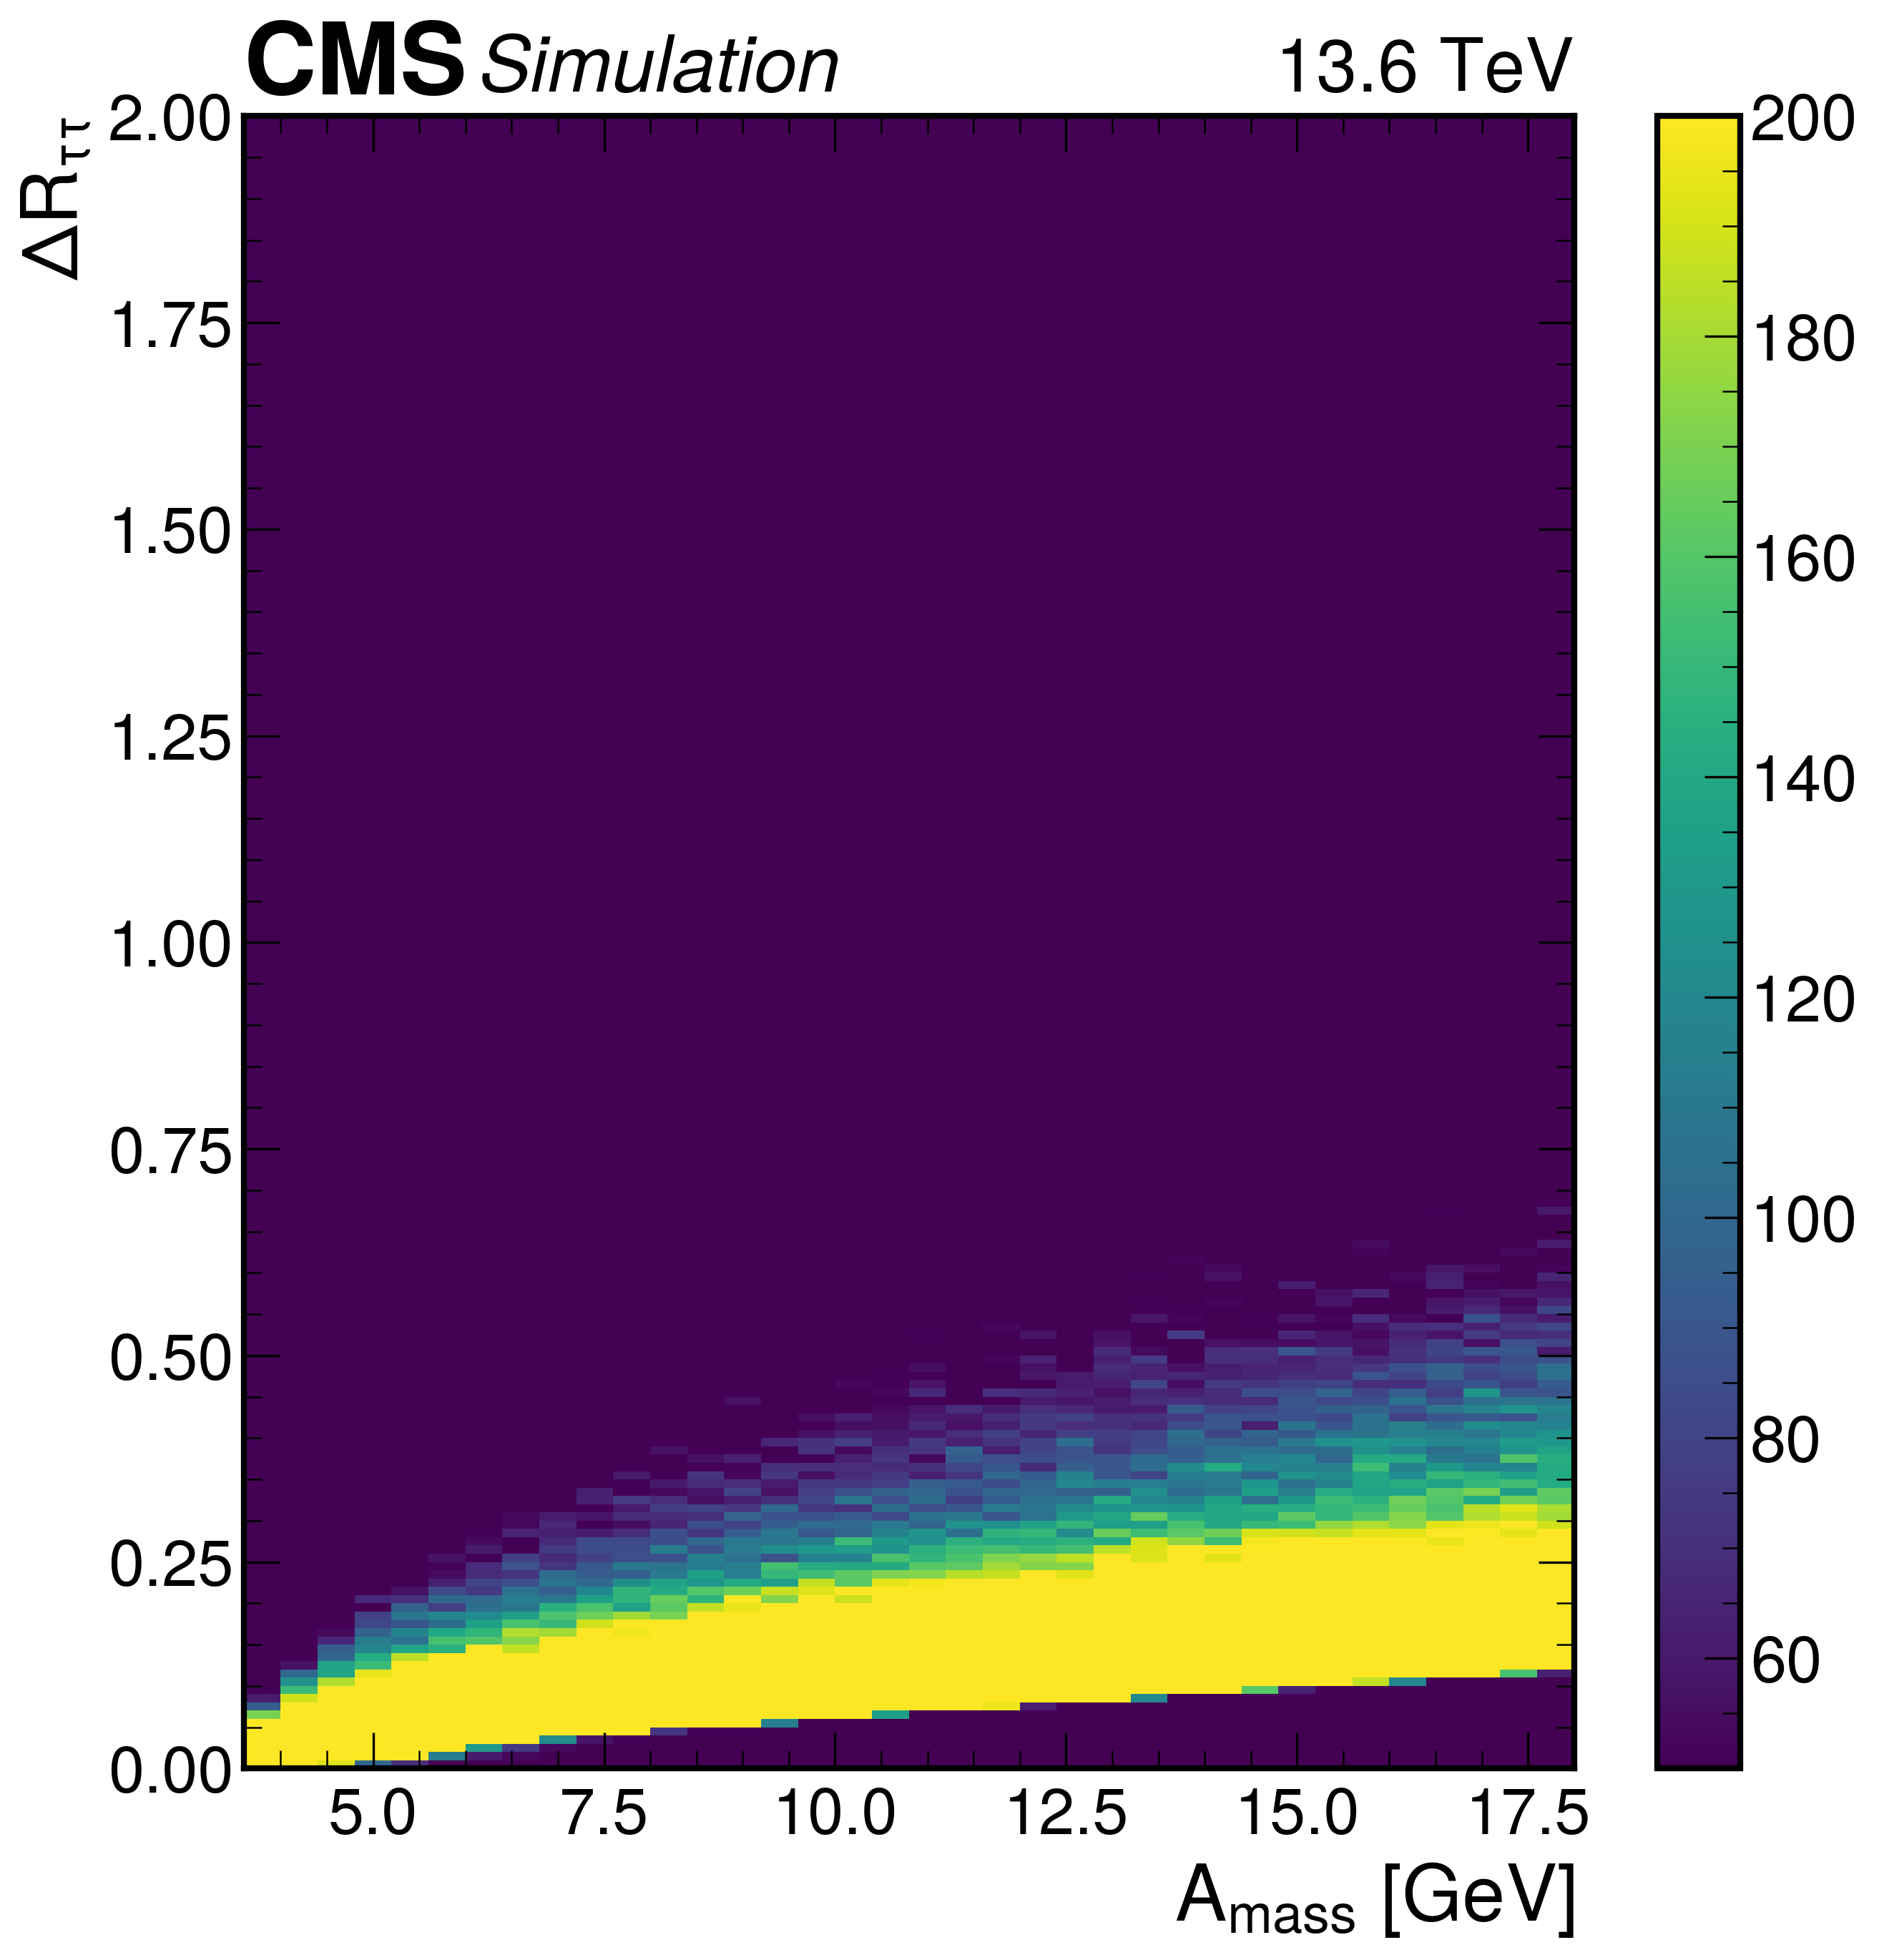

In [60]:
fig, ax = plt.subplots(dpi=300)
norm = mcolors.TwoSlopeNorm(vmin=50, vmax = 200, vcenter=125)
counts, xedges, yedges, _ = plt.hist2d(A_mass, TaudR, bins=[np.arange(3.6,18.1, .4), np.arange(0,2.01,0.01)],norm=norm)
plt.xlabel(r'${A_{mass}}$ [GeV]')
plt.ylabel(r'$\Delta R_{\tau \tau}$')
# plt.colorbar()
plt.colorbar().set_label(label='' )
# plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
plt.savefig(f'{out_dir}/mass_reg_dr_mass_plot.pdf', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show() 

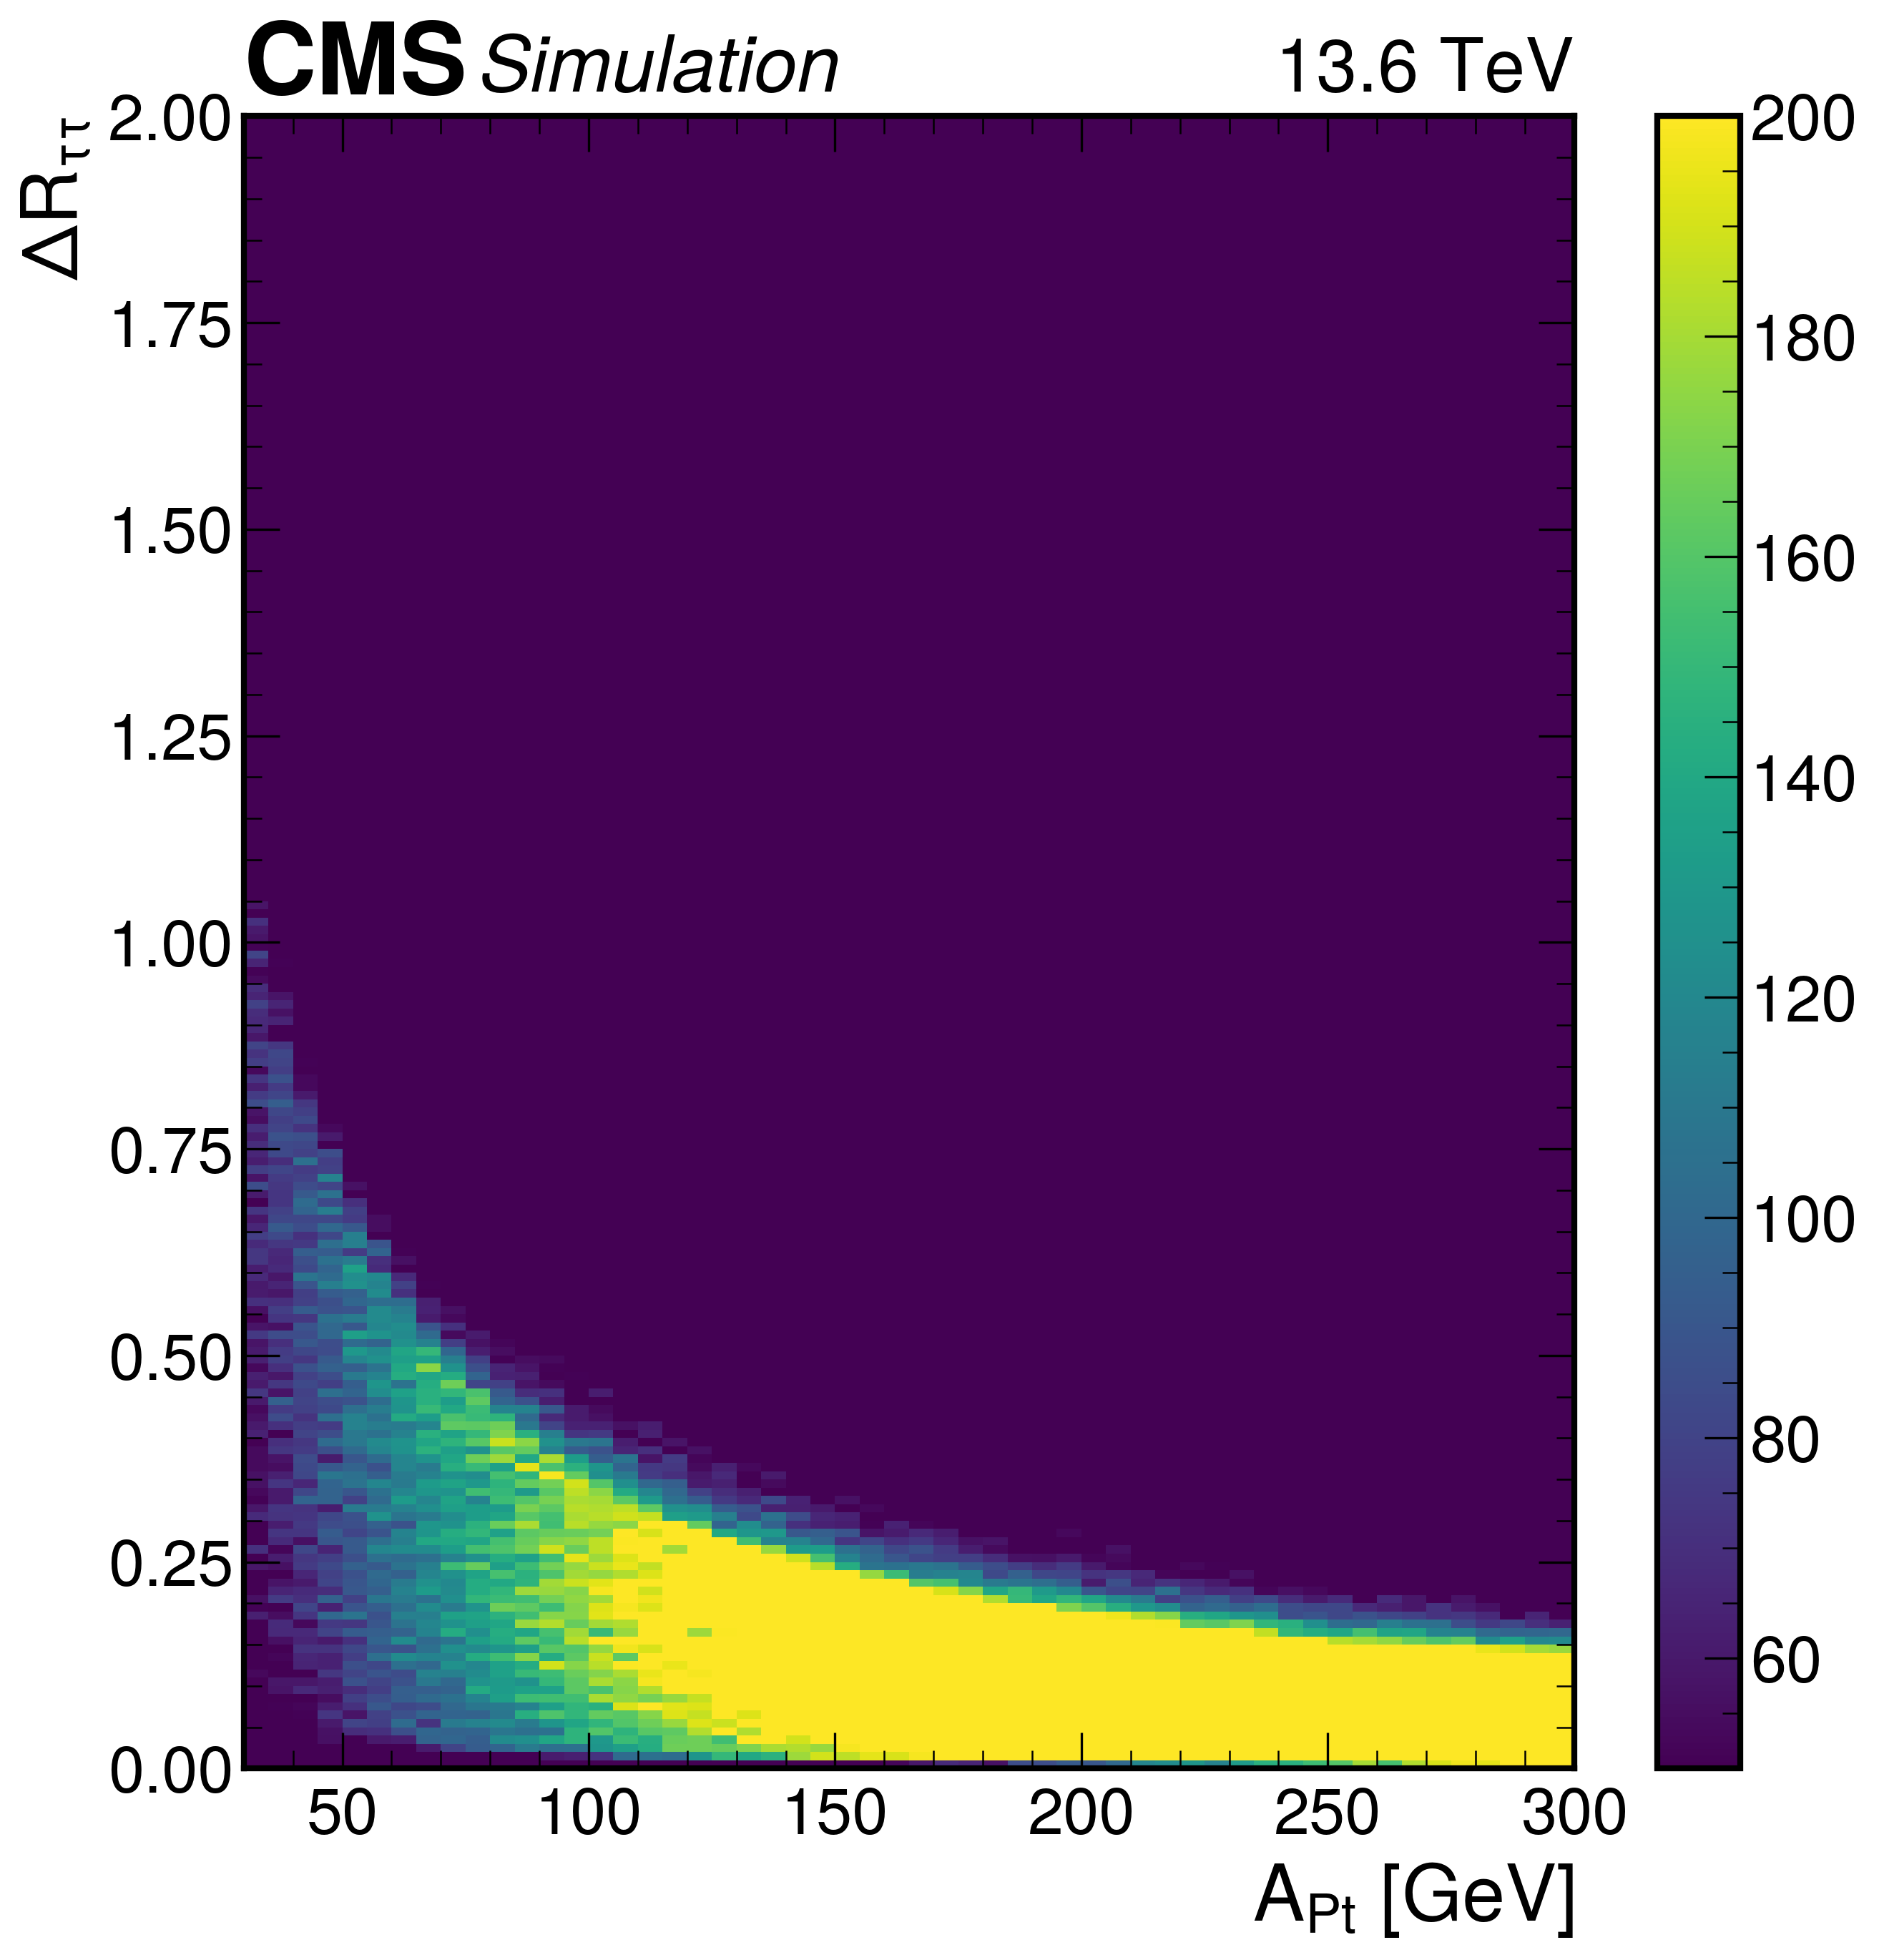

In [61]:
fig, ax = plt.subplots(dpi=300)
norm = mcolors.TwoSlopeNorm(vmin=50, vmax = 200, vcenter=125)
counts, xedges, yedges, _ = plt.hist2d(A_pt, TaudR, bins=[np.arange(30,301, 5), np.arange(0,2.01,0.01)], norm=norm)
plt.xlabel(r'${A_{Pt}}$ [GeV]')
plt.ylabel(r'$\Delta R_{\tau \tau}$')
# plt.colorbar()
plt.colorbar().set_label(label='' )
# plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
plt.savefig(f'{out_dir}/mass_reg_dr_pt_plot.pdf', bbox_inches='tight',dpi=350, facecolor = "w")
plt.show() 

keys-- <KeysViewHDF5 ['all_jet', 'am', 'apt', 'ieta', 'iphi', 'jetpt', 'm0', 'taudR']>


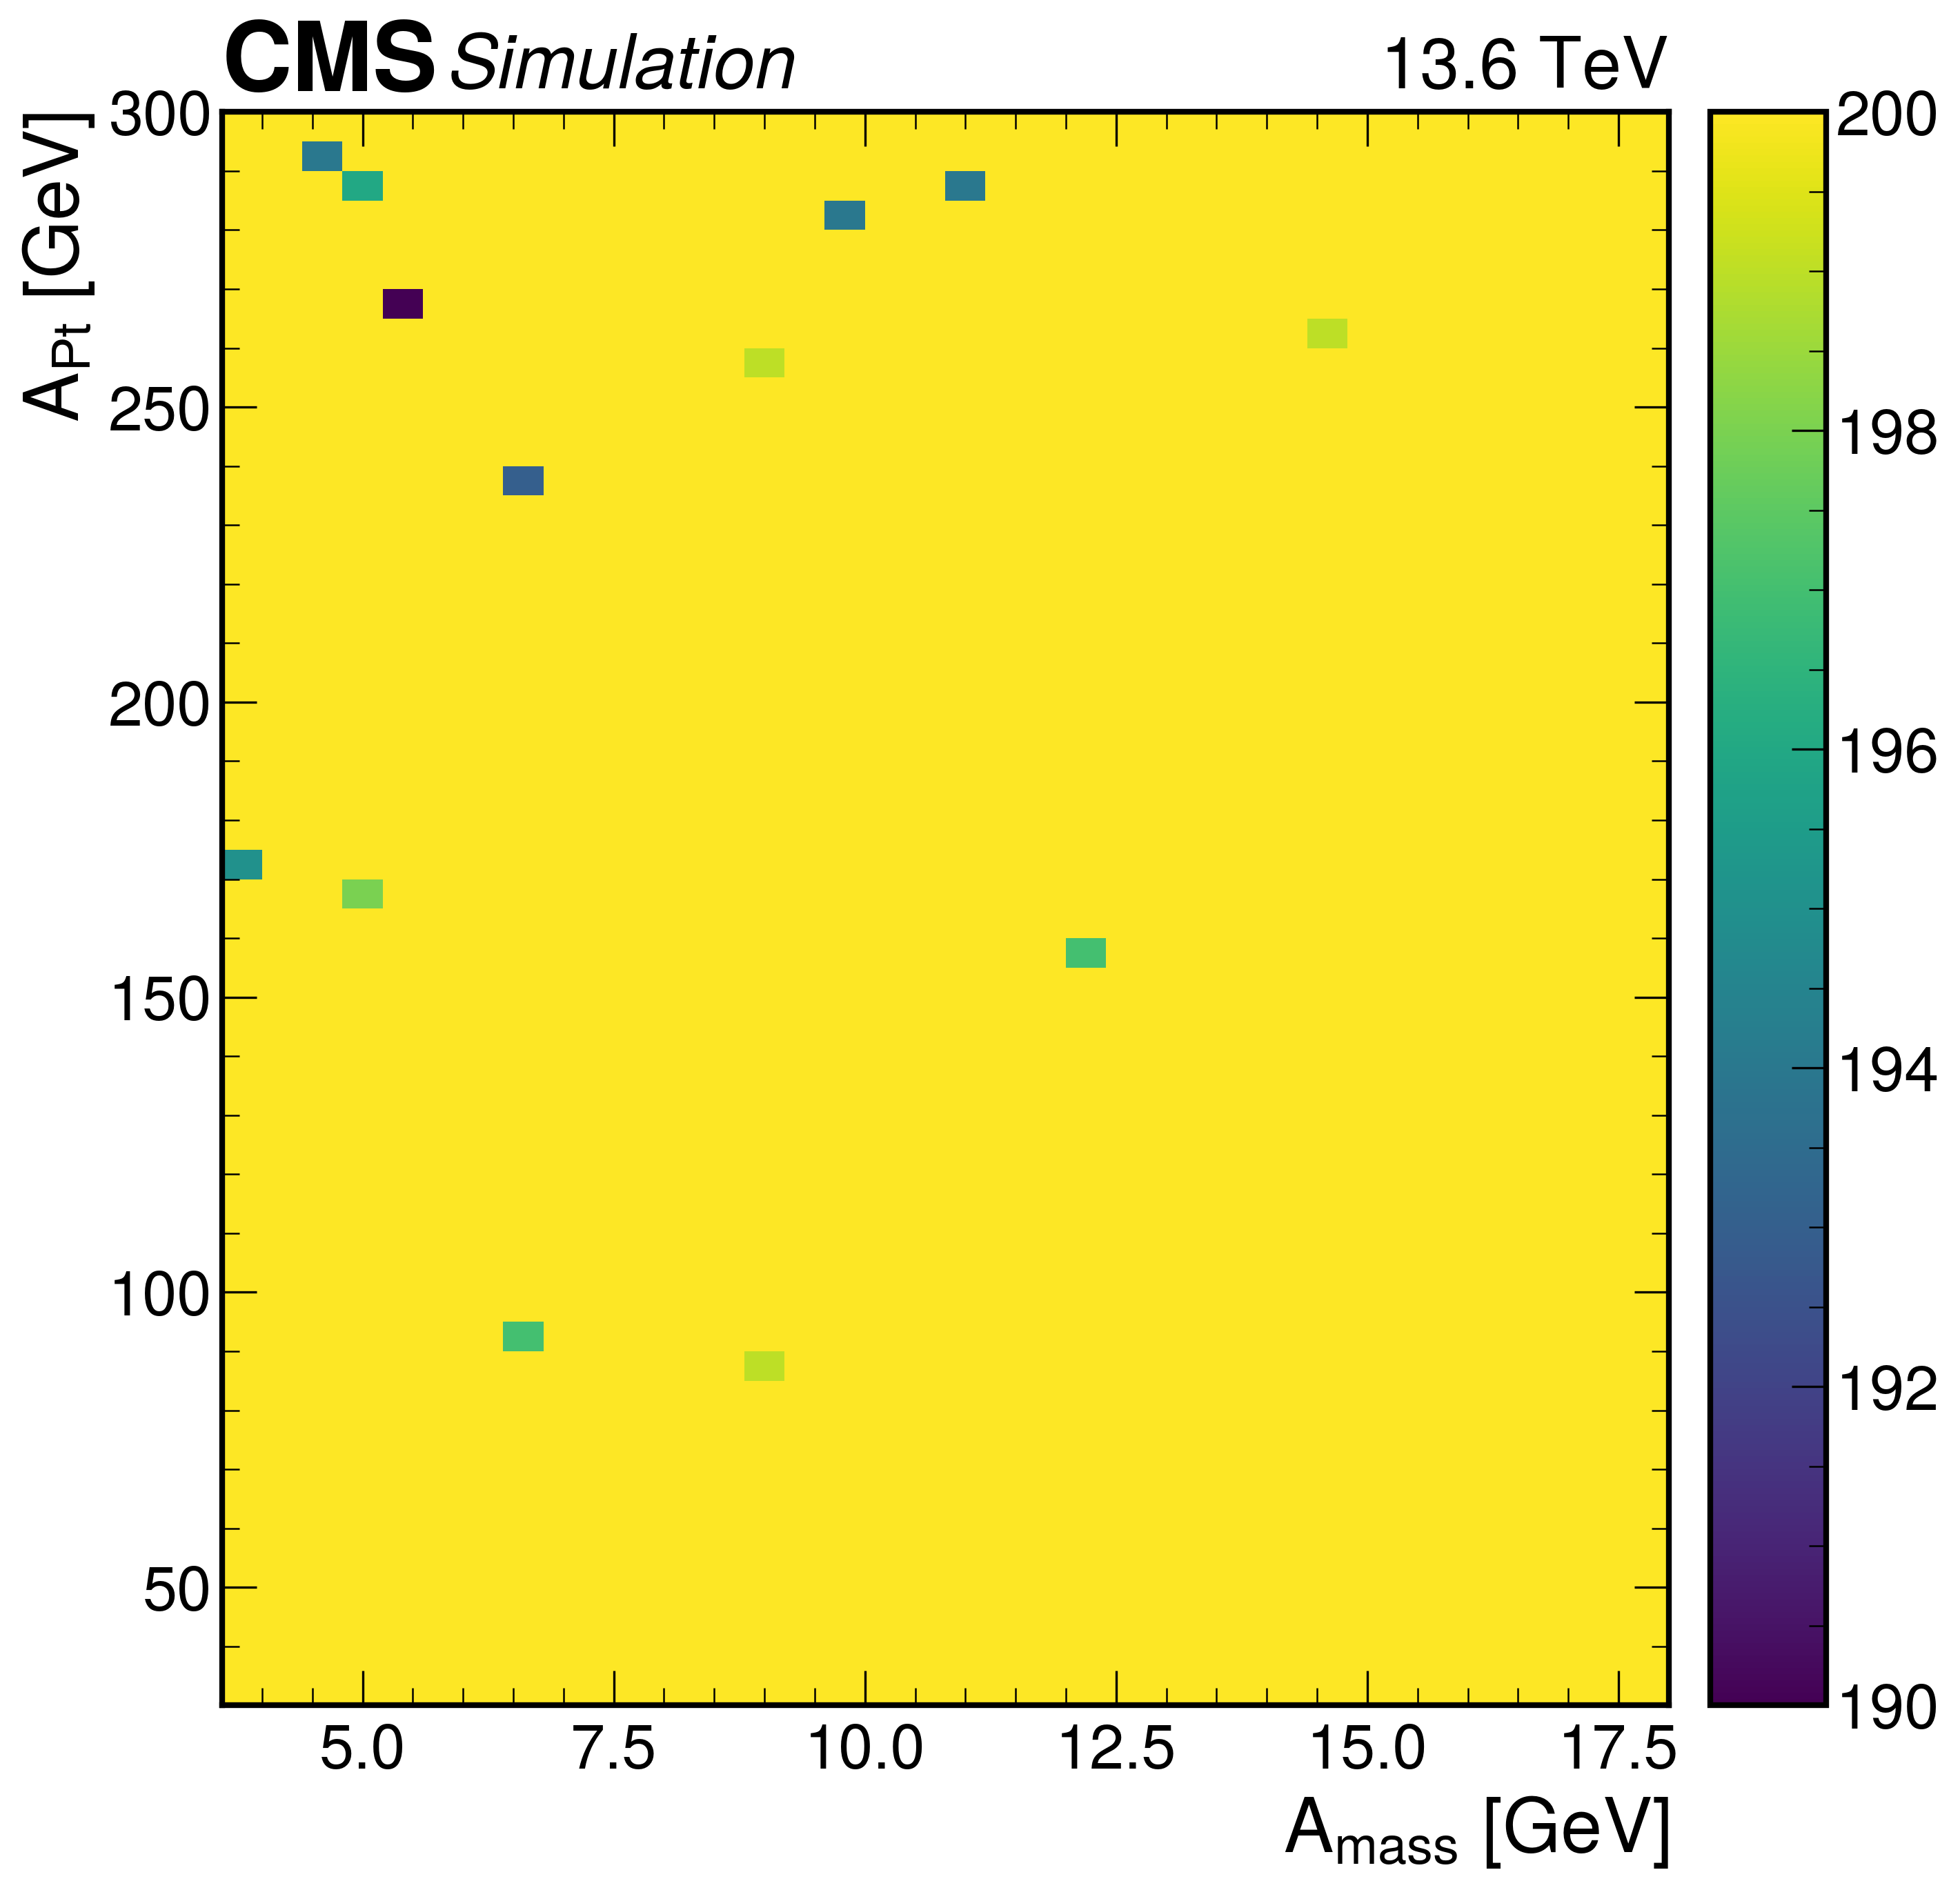

In [56]:
# Load HDF5 file
infile = "../analysis_run3/IMG_aToTauTau_Hadronic_m3p6To18_pt30T0300_unbiased_combined_valid.h5"
data = h5py.File(infile, 'r')
print("keys--", data.keys())

# Extract data
A_mass = data["am"][:].flatten()
A_pt = data["apt"][:].flatten()

# Create plot
fig, ax = plt.subplots(dpi=300)

# Define histogram
counts, xedges, yedges, hist = ax.hist2d(
    A_mass,
    A_pt,
    bins=[np.arange(3.6, 18.1, .4), np.arange(30, 301, 5)],
    cmap='viridis'  # or any other colormap you prefer
)

# Labeling
ax.set_xlabel(r'${A_{mass}}$ [GeV]')
ax.set_ylabel(r'${A_{Pt}}$ [GeV]')
hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)

# Add custom colorbar with controlled thickness
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="8%", pad=0.2)  # thickness = size
cb = fig.colorbar(hist, cax=cax)
# cb.set_label("Unbiased Counts")
plt.savefig(f'{out_dir}/mass_reg_biasing_plot_unbiased.pdf', bbox_inches='tight',dpi=300, facecolor = "w")
# Show plot
plt.show()


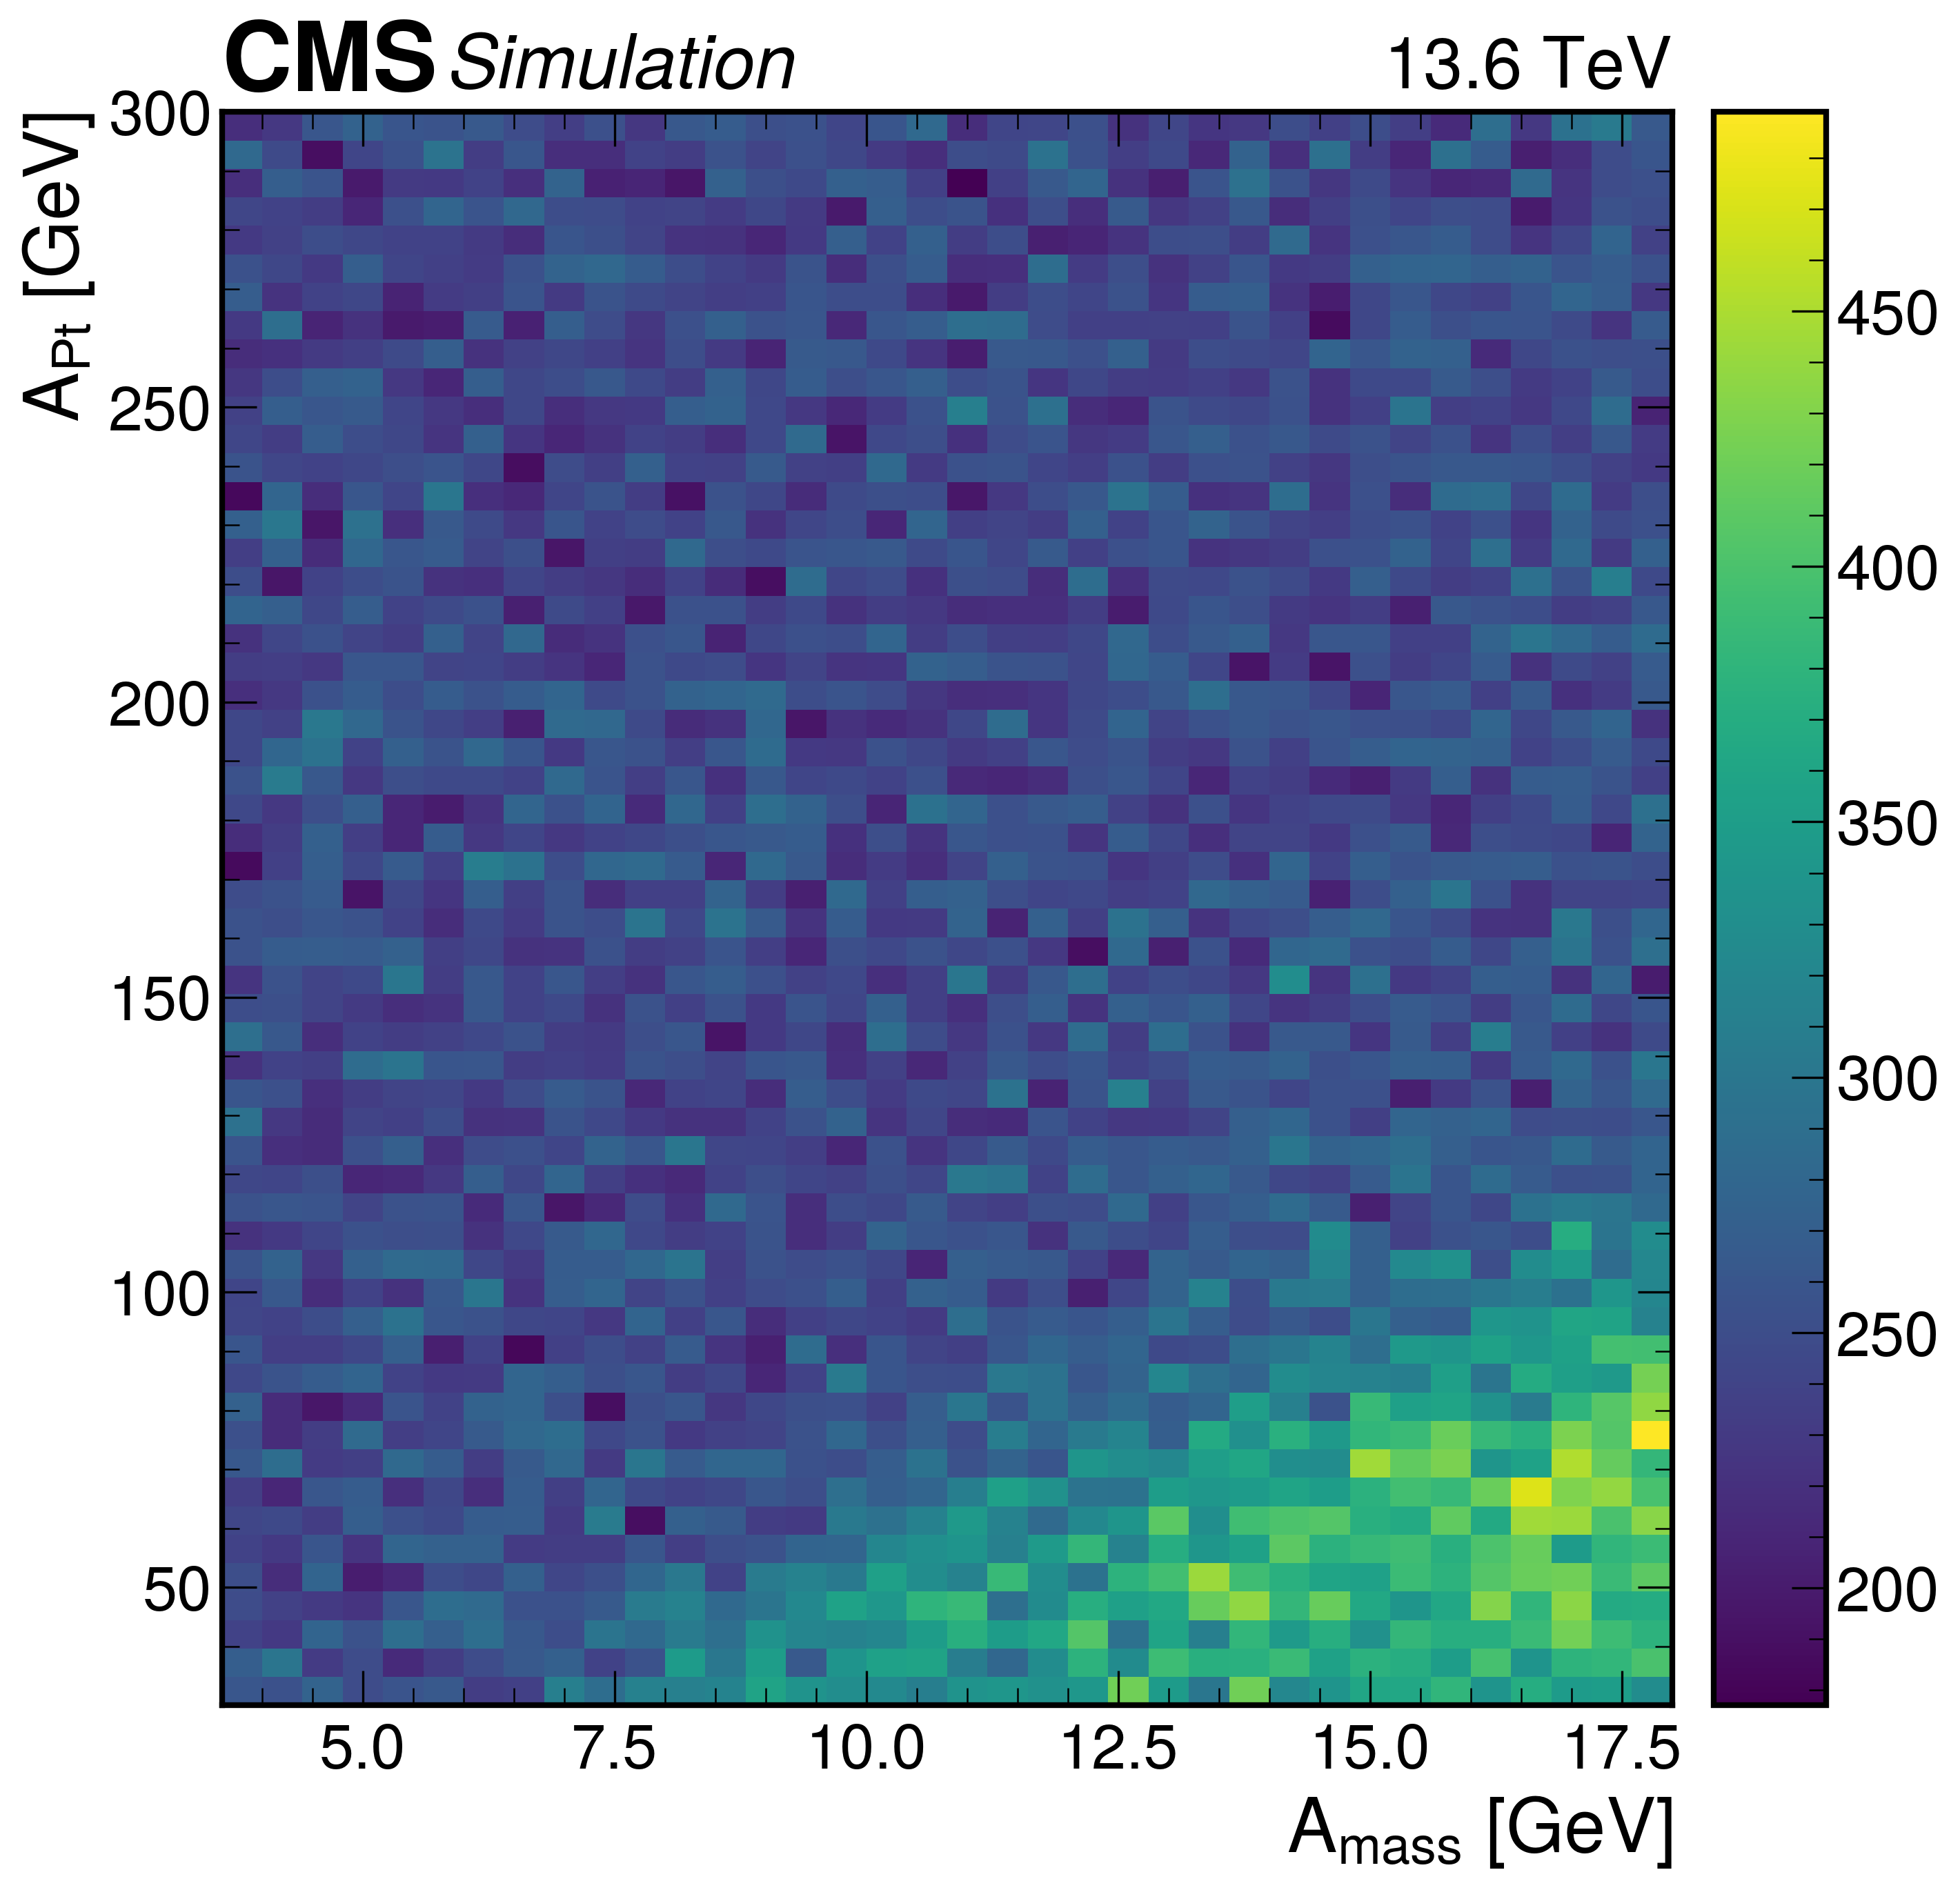

In [55]:
import pickle
with open('ATo2Tau_m3p6To18_pt30To300_0009.pkl', 'rb') as f:
    out = pickle.load(f)
with open('ATo2Tau_m3p6To18_pt30To300_0009.pkl', 'rb') as f:
    out = pickle.load(f)

fig, ax = plt.subplots(dpi=300)
# norm = mcolors.TwoSlopeNorm(vmin=500, vmax = 1000, vcenter=800)
out["train_mass_phy_9"]["a_mass_pt"].plot2d(ax=ax)
plt.xlabel(r'${A_{mass}}$ [GeV]')
plt.ylabel(r'${A_{Pt}}$ [GeV]')
# plt.colorbar().set_label(label='' )
# plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
plt.savefig(f'{out_dir}/mass_reg_biasing_plot_original.pdf', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show() 

loaded data file ------>  ../analysis_run3/test_data/epoch_13_inference_data.pkl
min  3.6536427 max  14.0


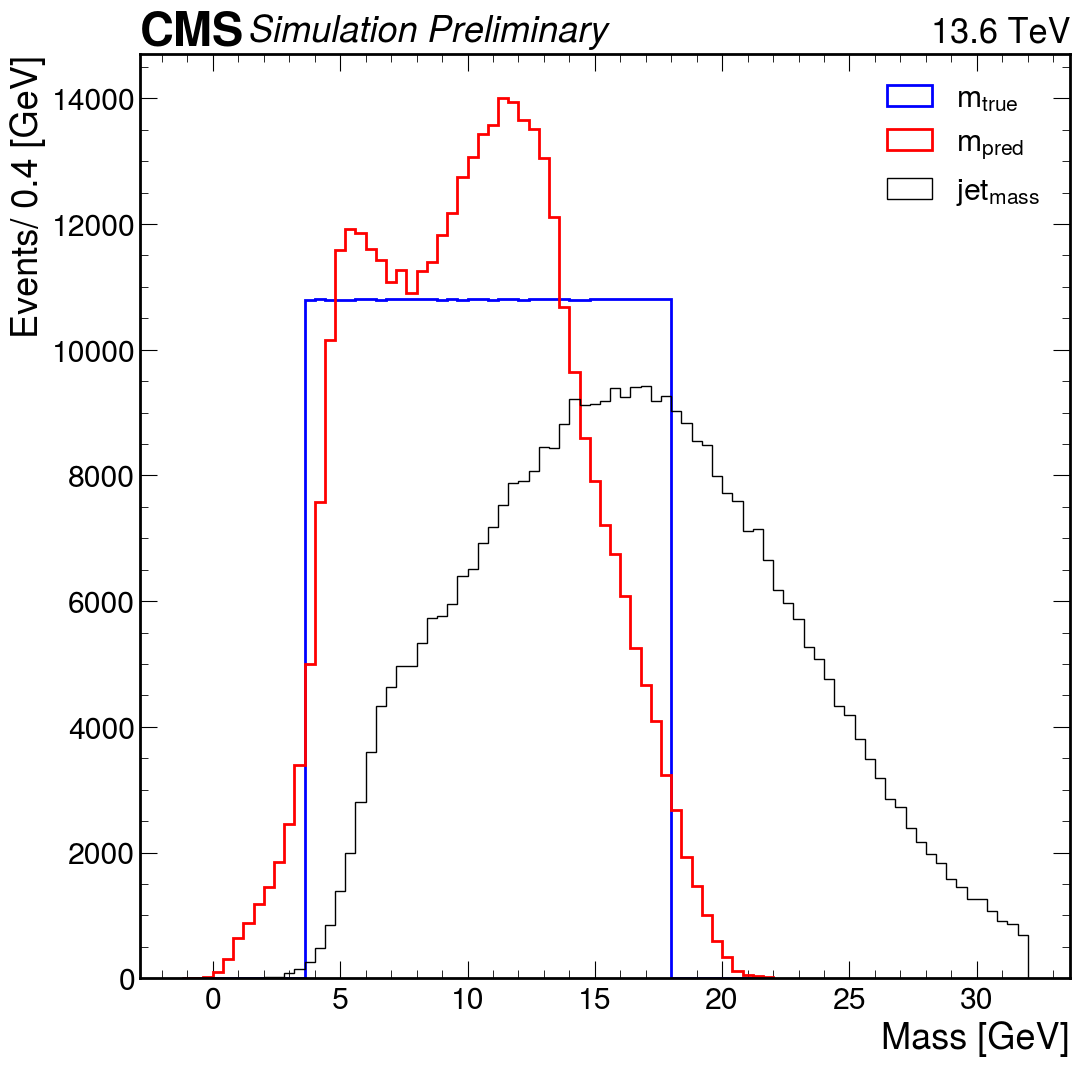

min  3.6536427 max  14.0


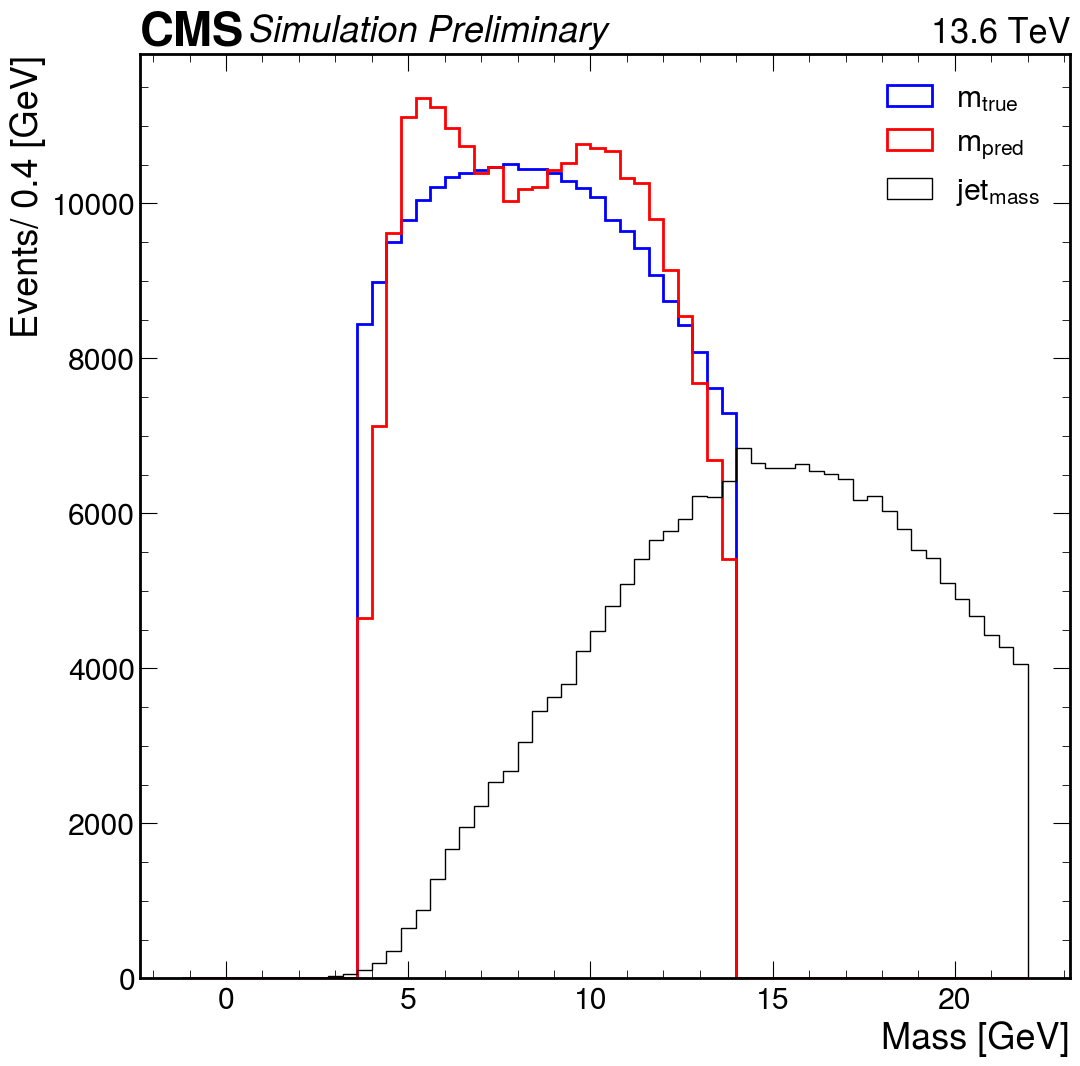

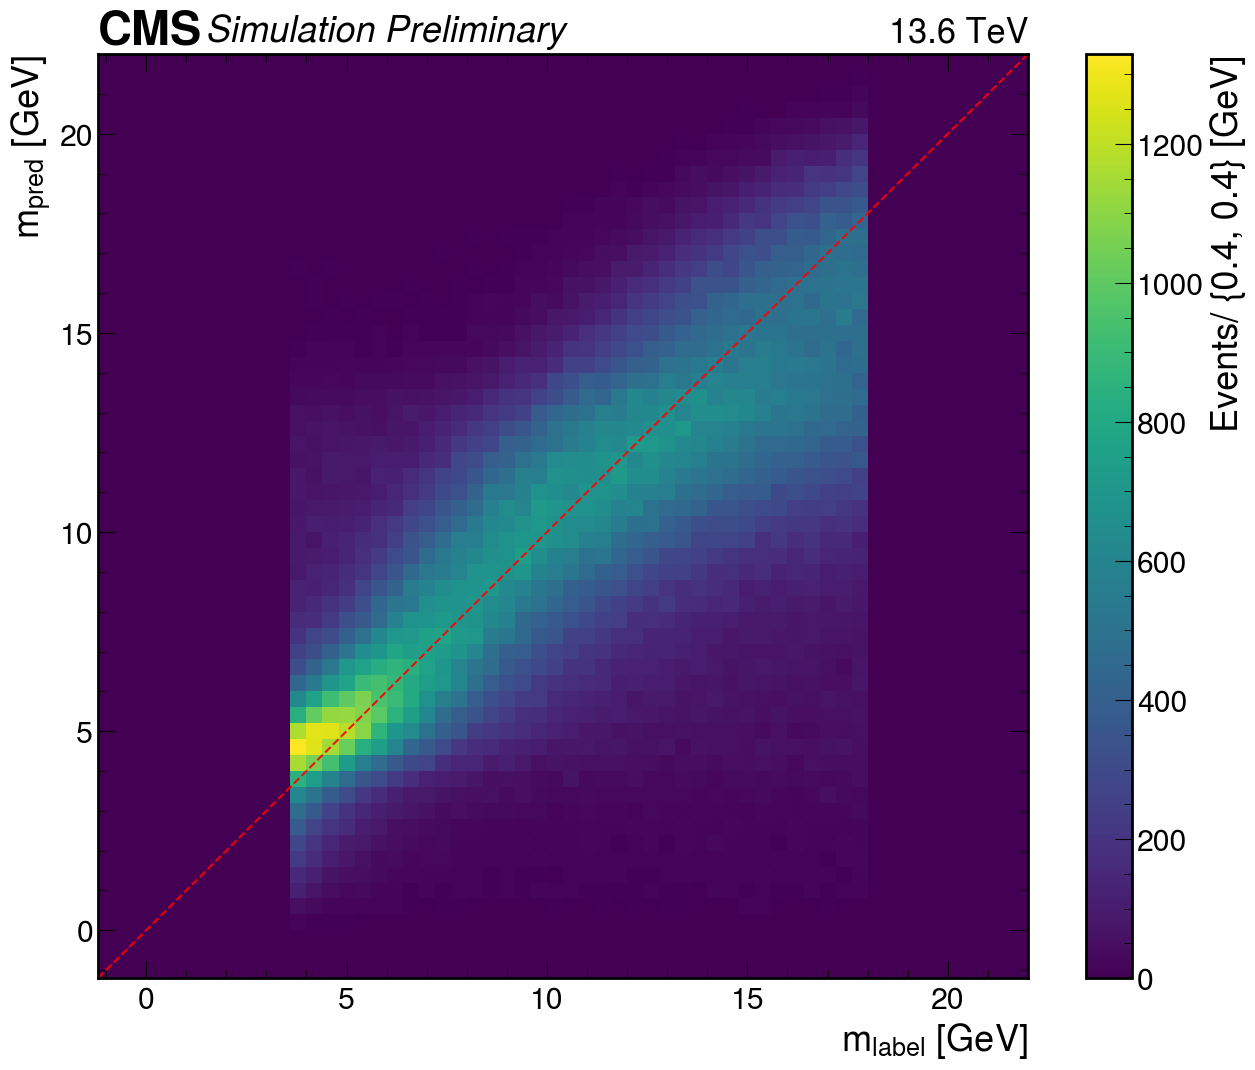

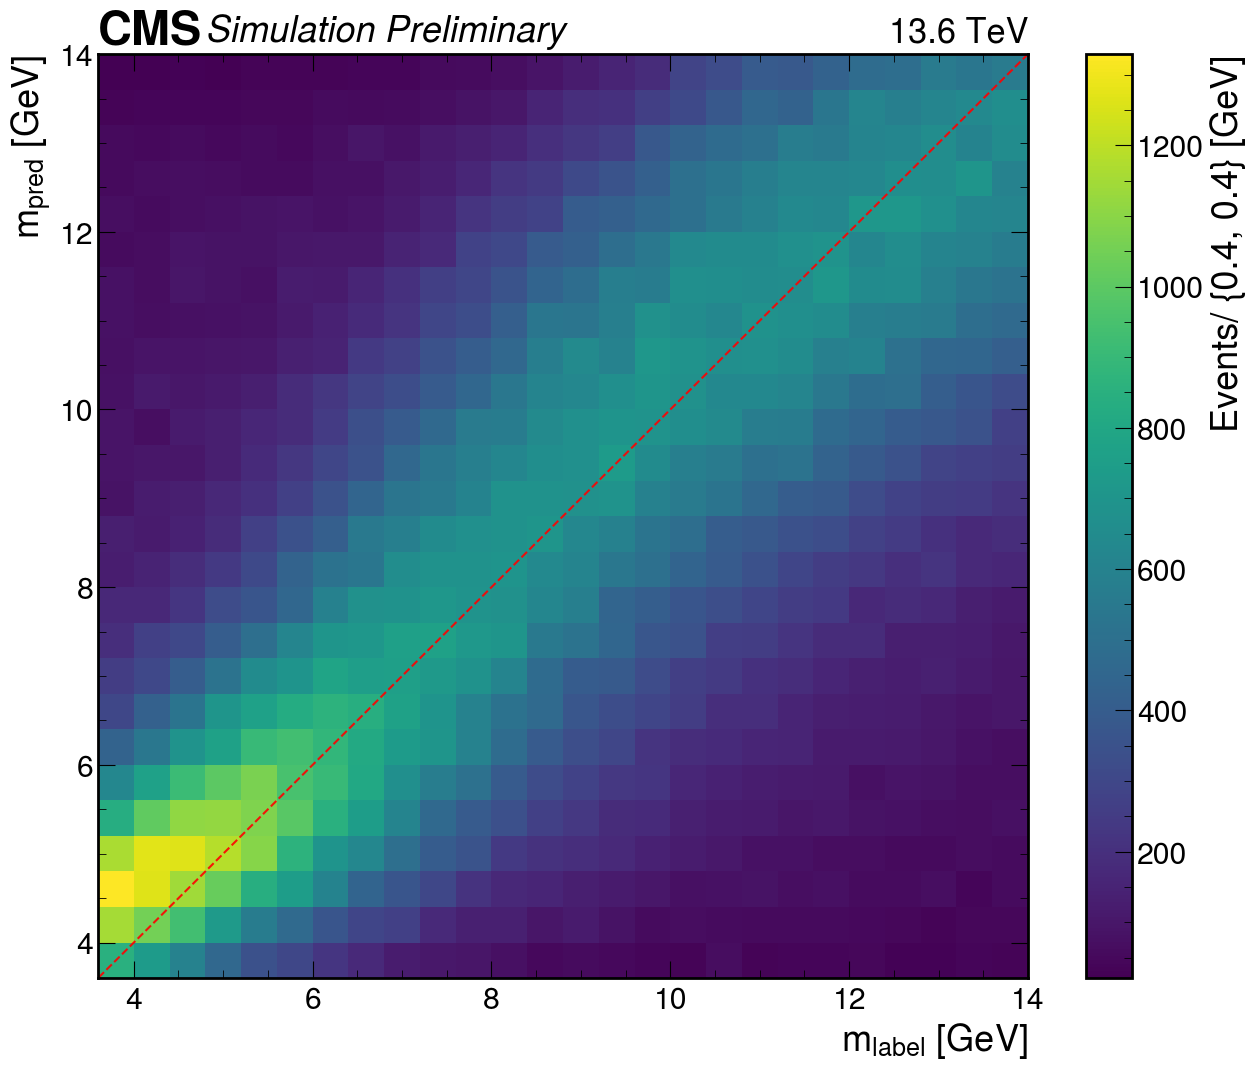

In [100]:
data_file = '../analysis_run3/test_data/epoch_13_inference_data.pkl'
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true = data["m_true"]
m_pred = data["m_pred"]
m0 = data["m0"]

mask1 = (m_true >= 3.6) & (m_true <=14)
m_true_ = m_true[mask1]
m_pred_ = m_pred[mask1]
m0_ = m0[mask1]
mask2 = (m_pred_ >=3.6) & (m_pred_ <=14)
m_true__ = m_true_[mask2]
m_pred__ = m_pred_[mask2]
m0__ = m0_[mask2]


m0_min = -1.2
m0_max = 22.1
bin_size =0.4

fig, ax = plt.subplots(figsize=(12,12), dpi=100)
plt.hist(m_true,  bins=np.arange(m0_min,m0_max,bin_size), histtype='step', label=r'$m_{true}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred, bins=np.arange(m0_min,m0_max,bin_size), histtype='step', label=r'$m_{pred}$', linestyle='-', color='red', linewidth=2)
plt.hist(m0, bins=np.arange(m0_min,m0_max+10,bin_size), histtype='step', label=r'$jet_{mass}$', linestyle='-', color='black')
print("min ", np.min(m_true_), "max ", np.max(m_true_))
# plt.title(f"Epoch")
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
plt.show()



fig, ax = plt.subplots(figsize=(12,12), dpi=100)
plt.hist(m_true__,  bins=np.arange(m0_min,m0_max,bin_size), histtype='step', label=r'$m_{true}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred__, bins=np.arange(m0_min,m0_max,bin_size), histtype='step', label=r'$m_{pred}$', linestyle='-', color='red', linewidth=2)
plt.hist(m0__, bins=np.arange(m0_min,m0_max,bin_size), histtype='step', label=r'$jet_{mass}$', linestyle='-', color='black')
print("min ", np.min(m_true_), "max ", np.max(m_true_))
# plt.title(f"Epoch")
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(15,12), dpi=100)
hist = plt.hist2d(np.squeeze(m_true), np.squeeze(m_pred), bins=[np.arange(m0_min, m0_max, .4), np.arange(m0_min, m0_max, .4)])
plt.xlabel(r'$m_{label}$ [GeV]')
plt.ylabel(r'$m_{pred}$ [GeV]')
plt.plot((m0_min, m0_max), (m0_min, m0_max), color='r', linestyle='--', alpha=0.9)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(15,12), dpi=100)
hist = plt.hist2d(np.squeeze(m_true__), np.squeeze(m_pred__), bins=[np.arange(3.6, 14.1, .4), np.arange(3.6, 14.1, .4)])
plt.xlabel(r'$m_{label}$ [GeV]')
plt.ylabel(r'$m_{pred}$ [GeV]')
plt.plot((m0_min, m0_max), (m0_min, m0_max), color='r', linestyle='--', alpha=0.9)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
plt.show()

In [14]:
# file = uproot.open("data/GenInfo_only_90.root")
file_m3p7 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/Gen_reco_Info_with_multi_trigger_H_A_4Tau_M3p7_combined.root")
file_m4 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/Gen_reco_Info_with_multi_trigger_H_A_4Tau_M4_combined.root")
file_m5 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/Gen_reco_Info_with_multi_trigger_H_A_4Tau_M5_combined.root")
file_m6 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/Gen_reco_Info_with_multi_trigger_H_A_4Tau_M6_combined.root")
file_m8 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/Gen_reco_Info_with_multi_trigger_H_A_4Tau_M8_combined.root")
file_m10 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/Gen_reco_Info_with_multi_trigger_H_A_4Tau_M10_combined.root")
file_m12 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/Gen_reco_Info_with_multi_trigger_H_A_4Tau_M12_combined.root")
file_m14 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/Gen_reco_Info_with_multi_trigger_H_A_4Tau_M14_combined.root")

RHTree_m3p7 = file_m3p7["fevt/RHTree"]
RHTree_m4 = file_m4["fevt/RHTree"]
RHTree_m5 = file_m5["fevt/RHTree"]
RHTree_m6 = file_m6["fevt/RHTree"]
RHTree_m8 = file_m8["fevt/RHTree"]
RHTree_m10 = file_m10["fevt/RHTree"]
RHTree_m12 = file_m12["fevt/RHTree"]
RHTree_m14 = file_m14["fevt/RHTree"]
signal_mass = ['3.7', '4', '5', '6', '8', '10', '12', '14']
label_mass  = ['3p7','4', '5', '6', '8', '10', '12', '14']
RHTree_list = [RHTree_m3p7,RHTree_m4, RHTree_m5, RHTree_m6, RHTree_m8,RHTree_m10, RHTree_m12, RHTree_m14]

In [16]:
# for i, RHTree in enumerate(RHTree_list):
#     Tau1_Tau2_dphi = RHTree.arrays(["Tau1_Tau2_dphi"],"Tau1_Tau2_dphi > -111",library="pd")['Tau1_Tau2_dphi']
#     Tau1_Tau2_deta = RHTree.arrays(["Tau1_Tau2_deta"],"Tau1_Tau2_deta > -111",library="pd")['Tau1_Tau2_deta']
#     eta= Tau1_Tau2_deta
#     phi= Tau1_Tau2_dphi
#     bins = np.arange(0,40,1)
#     fig, ax = plt.subplots(figsize=(12, 10), dpi=300)
#     norm = mcolors.TwoSlopeNorm(vmin=0, vmax = 1, vcenter=.5)
#     crystal_eta = eta / 0.0174
#     crystal_phi = phi / 0.0174
#     H, xedges, yedges = np.histogram2d(crystal_eta, crystal_phi, bins =[bins, bins], density = True)
#     H_normalized = H/H.max((0,1)) # the max value of the histogrm is 1
#     extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
#     im = ax.imshow(H_normalized, extent=extent, interpolation='none',origin ='lower')
#     plt.colorbar(im, ax=ax, label='Event density')
#     # plt.xticks(np.arange(0,30,1),size=12)
#     # plt.yticks(np.arange(0,30,1),size=12)
#     plt.ylabel(r"$\Delta \eta\; (\tau_1,\tau_2)_{\mathrm{gen}}$")
#     plt.xlabel(r"$\Delta \phi\; (\tau_1,\tau_2)_{\mathrm{gen}}$")
#     plt.grid(color='white', linestyle='--')
#     hep.cms.label(llabel=f"Simulation ", rlabel=f"   $m_A$={signal_mass[i]} GeV          13.6 TeV", loc=0, ax=ax)
#     plt.savefig(f'{out_dir}/dphi_deta_signal_mass_{label_mass[i]}.pdf',  bbox_inches='tight', dpi=300, facecolor = "w")
#     plt.show()

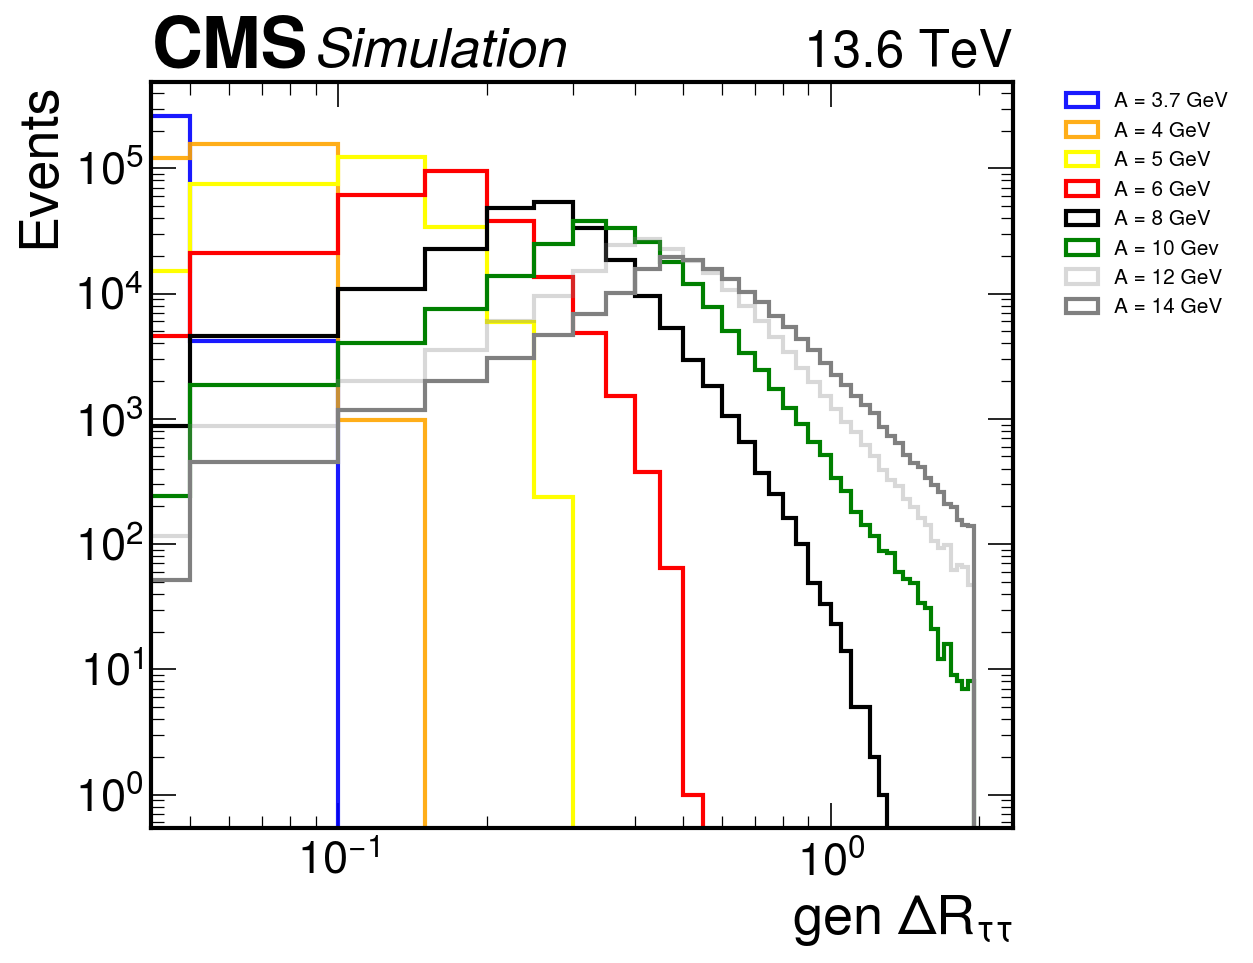

In [117]:
dR_Tau1_Tau23p7 = RHTree_m3p7.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
dR_Tau1_Tau24 = RHTree_m4.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
dR_Tau1_Tau25 = RHTree_m5.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
dR_Tau1_Tau26 = RHTree_m6.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
dR_Tau1_Tau28 = RHTree_m8.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
dR_Tau1_Tau210 = RHTree_m10.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
dR_Tau1_Tau212 = RHTree_m12.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']
dR_Tau1_Tau214 = RHTree_m14.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']


fig, ax = plt.subplots(figsize=(9, 7), dpi=150)
plt.hist(dR_Tau1_Tau23p7,bins=np.arange(0,2,.05),histtype='step',linestyle='-',linewidth=2, color='b',alpha=0.9,label="A = 3.7 GeV", density = False)
plt.hist(dR_Tau1_Tau24,bins=np.arange(0,2,.05),histtype='step',linestyle='-',linewidth=2, color='orange',alpha=0.9, label="A = 4 GeV",density = False)
plt.hist(dR_Tau1_Tau25,bins=np.arange(0,2,.05),histtype='step',linestyle='-',linewidth=2,color='yellow',label="A = 5 GeV",density = False)
plt.hist(dR_Tau1_Tau26,bins=np.arange(0,2,.05),histtype='step',linestyle='-',linewidth=2,color='r',label="A = 6 GeV",density = False)
plt.hist(dR_Tau1_Tau28,bins=np.arange(0,2,.05),histtype='step',linestyle='-',linewidth=2,color='black',label="A = 8 GeV",density = False)
plt.hist(dR_Tau1_Tau210,bins=np.arange(0,2,.05),histtype='step',linestyle='-',linewidth=2,color='g',label="A = 10 Gev",density = False)
plt.hist(dR_Tau1_Tau212,bins=np.arange(0,2,.05),histtype='step',linestyle='-',linewidth=2,color='grey',alpha=0.3,label="A = 12 GeV",density = False)
plt.hist(dR_Tau1_Tau214,bins=np.arange(0,2,.05),histtype='step',linestyle='-',linewidth=2,color='grey',label="A = 14 GeV",density = False)
plt.xscale('log')
plt.yscale('log')
ax.legend(
    loc='upper left',
    bbox_to_anchor=(1.05, 1),
    borderaxespad=0.,
    fontsize=10
)
plt.ylabel("Events")
plt.xlabel(r"gen $\Delta R_{\tau\tau}$")
hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
plt.tight_layout()
if save: plt.savefig('%s/gen_dR_Tau1_Tau2_hist_all_signal.jpeg'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

loaded data file ------>  ../analysis_run3/mass_regression_test_data/upper_lower_streching_epoch_36_signal_mass_3p7_inference_data.pkl


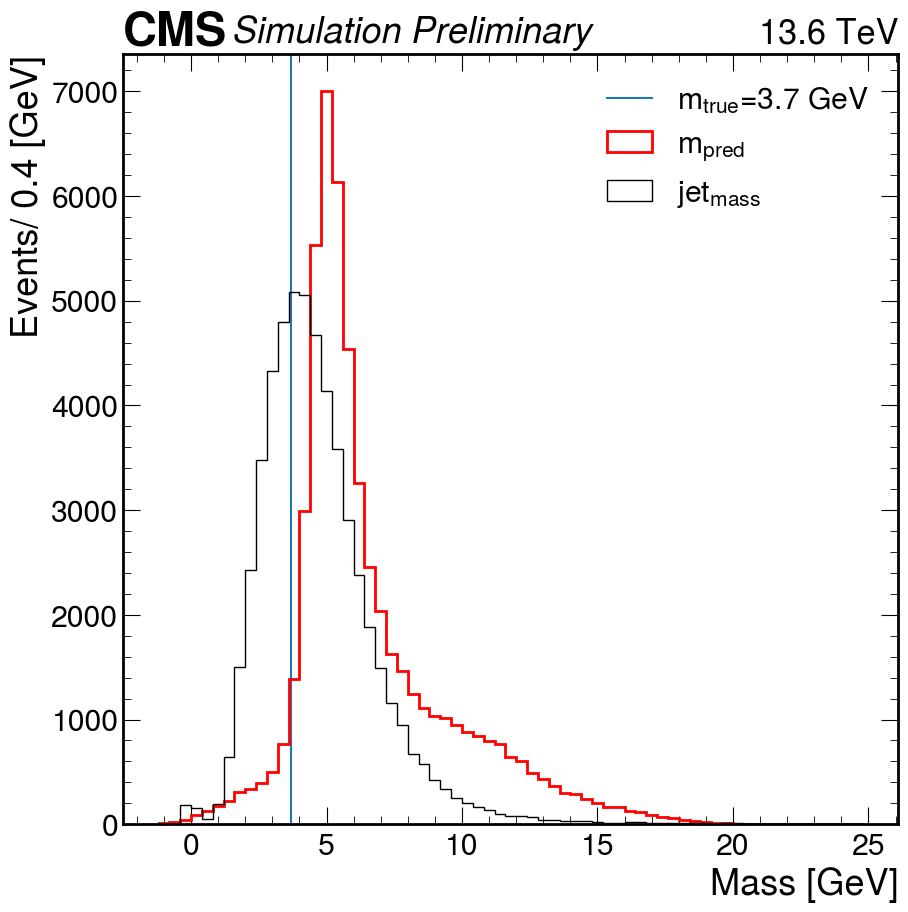

loaded data file ------>  ../analysis_run3/mass_regression_test_data/upper_lower_streching_epoch_36_signal_mass_14_inference_data.pkl


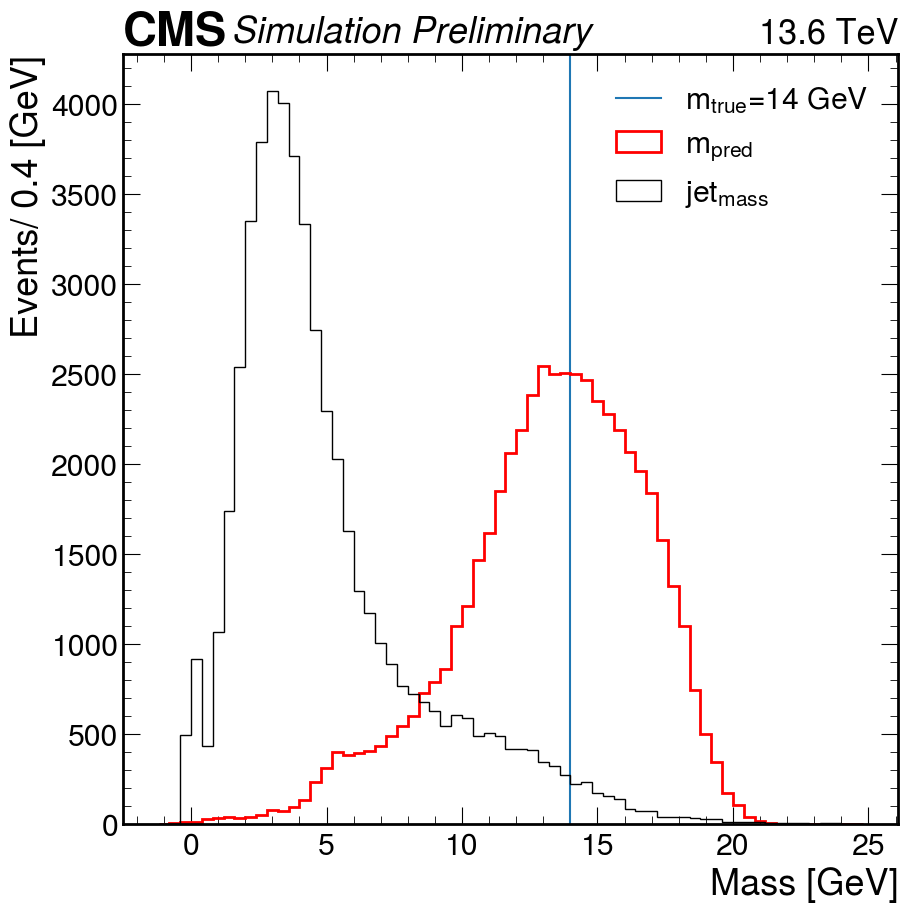

In [22]:
Mass = ['3p7', '14']
# Mass=Mass[1]
for Mass in Mass:
    data_file = f'../analysis_run3/mass_regression_test_data/upper_lower_streching_epoch_36_signal_mass_{Mass}_inference_data.pkl'
    # data_file = f'../analysis_run3/mass_regression_test_data/lower_streching_epoch_36_signal_mass_{Mass}_inference_data.pkl'
    # data_file = f'../analysis_run3/mass_regression_test_data/min_max_epoch_36_signal_mass_{Mass}_inference_data.pkl'
    infile = open(f"{data_file}", "rb")
    data = pickle.load(infile)
    print(f"loaded data file ------>  {data_file}")
    infile.close()

    m_true = {'3p7':3.7, '4':4, '6':6, '14':14}.get(Mass, None)
    m_pred = data["m_pred"]
    jet_mass = data["jet_mass"]
    jet_pt = data["jet_pt"]

    mask2 = (m_pred >=3.6) & (m_pred <=14)
    m_pred_ = m_pred[mask2]
    jet_mass_ = jet_mass[mask2]
    jet_pt_ = jet_pt[mask2]

    m0_min=-1.2
    m0_max=25.1
    bin_size =0.4
    fig, ax = plt.subplots(figsize=(10,10), dpi=100)
    plt.axvline(m_true, label=r"$m_{true}$" + f"={m_true} GeV")
    plt.hist(m_pred, bins=np.arange(m0_min,m0_max,bin_size), histtype='step', label=r'$m_{pred}$', linestyle='-', color='red', linewidth=2)
    plt.hist(jet_mass, bins=np.arange(m0_min,m0_max,bin_size), histtype='step', label=r'$jet_{mass}$', linestyle='-', color='black')
    plt.xlabel('Mass [GeV]')
    plt.ylabel('Events/ 0.4 [GeV]')
    plt.legend(loc='upper right')
    hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
    plt.show()



loaded data file ------>  ../analysis_run3/mass_regression_test_data/upper_lower_streching_epoch_36_signal_mass_3p7_inference_data.pkl


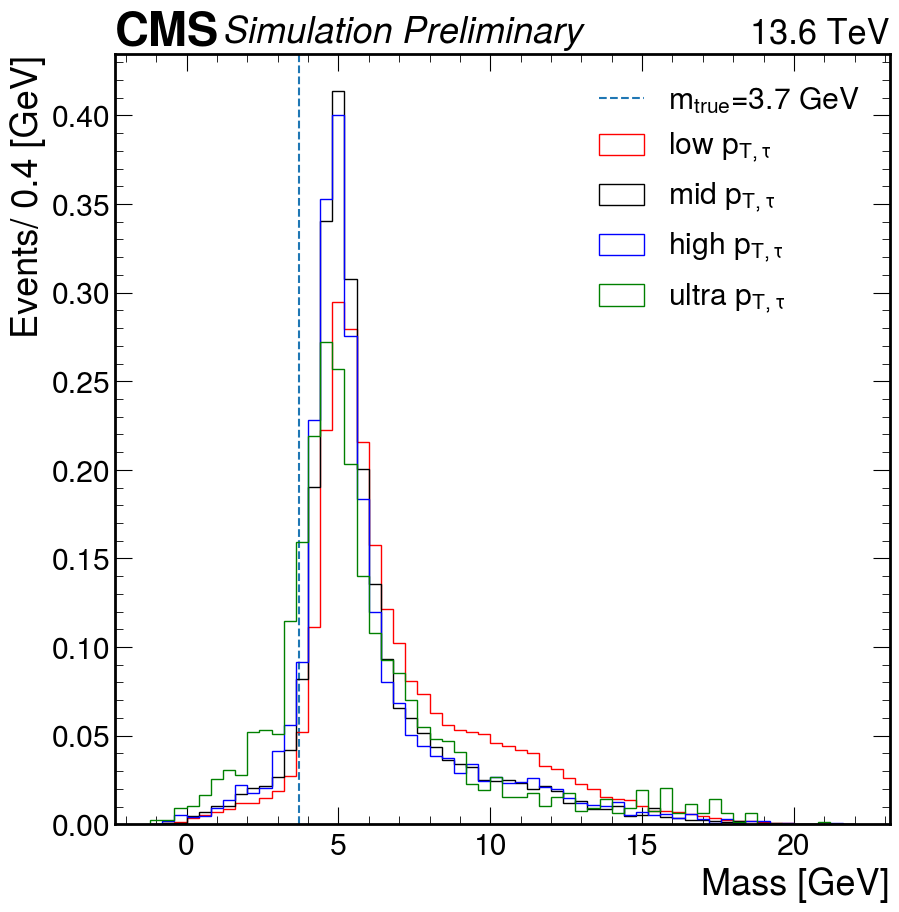

In [50]:
Mass ='3p7'
data_file = f'../analysis_run3/mass_regression_test_data/upper_lower_streching_epoch_36_signal_mass_3p7_inference_data.pkl'
# data_file = f'../analysis_run3/mass_regression_test_data/lower_streching_epoch_36_signal_mass_{Mass}_inference_data.pkl'
# data_file = f'../analysis_run3/mass_regression_test_data/min_max_epoch_36_signal_mass_{Mass}_inference_data.pkl'
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true = {'3p7':3.7, '4':4, '6':6, '14':14}.get(Mass, None)
m_pred = data["m_pred"]
jet_mass = data["jet_mass"]
jet_pt = data["jet_pt"]

mask1 = (jet_pt >=20) & (jet_pt <55)
mask2 = (jet_pt >=55) & (jet_pt <70)
mask3 = (jet_pt >=70) & (jet_pt <100)
mask4 = jet_pt >=100

m_pred1= m_pred[mask1]
m_pred2= m_pred[mask2] 
m_pred3= m_pred[mask3]
m_pred4= m_pred[mask4]
         
m0_min=-1.2
m0_max=22.1
bin_size =0.4
bins=np.arange(m0_min,m0_max,bin_size)        
fig, ax = plt.subplots(figsize=(10,10), dpi=100)
plt.axvline(m_true, linestyle='--', label=r"$m_{true}$" + f"={m_true} GeV")
# plt.hist(m_pred1,bins=np.arange(m0_min,m0_max,bin_size), histtype='step', label='Pt:[20-50] GeV', linestyle='-', color='red', linewidth=2)
# plt.hist(m_pred2,bins=np.arange(m0_min,m0_max,bin_size), histtype='step', label='Pt:[50-70] GeV', linestyle='-', color='blue', linewidth=2)
# plt.hist(m_pred3,bins=np.arange(m0_min,m0_max,bin_size), histtype='step', label='Pt:[70-100] GeV', linestyle='-', color='green', linewidth=2)
# plt.hist(m_pred4,bins=np.arange(m0_min,m0_max,bin_size), histtype='step', label='Pt:>=100 GeV', linestyle='-', color='grey', linewidth=2)
plt.hist(m_pred1, bins=bins, histtype='step', label=r'low $p_{T,\tau}$', color='red', density=True, linewidth=1)
plt.hist(m_pred2, bins=bins, histtype='step', label=r'mid $p_{T,\tau}$', color='black', density=True, linewidth=1)
plt.hist(m_pred3, bins=bins, histtype='step', label=r'high $p_{T,\tau}$', color='blue', density=True, linewidth=1)
plt.hist(m_pred4, bins=bins, histtype='step', label=r'ultra $p_{T,\tau}$', color='green', density=True, linewidth=1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
plt.show()

loaded data file ------>  ../analysis_run3/mass_regression_test_data/upper_lower_streching_epoch_36_signal_mass_3p7_inference_data.pkl


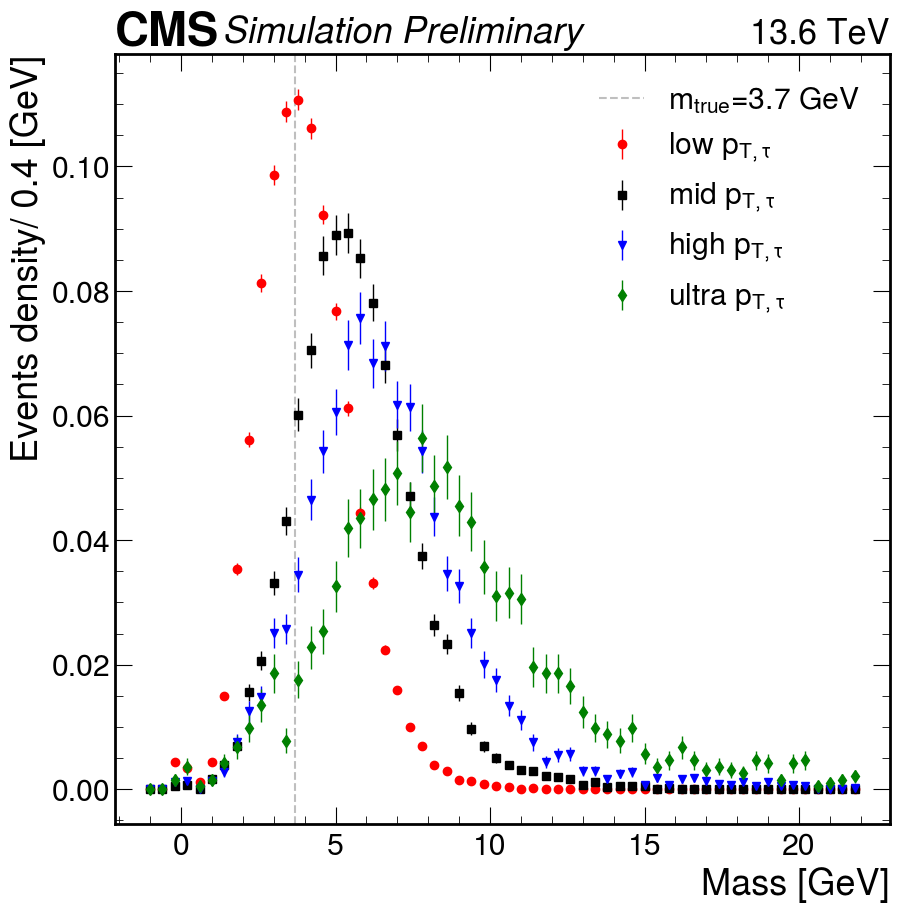

loaded data file ------>  ../analysis_run3/mass_regression_test_data/upper_lower_streching_epoch_36_signal_mass_14_inference_data.pkl


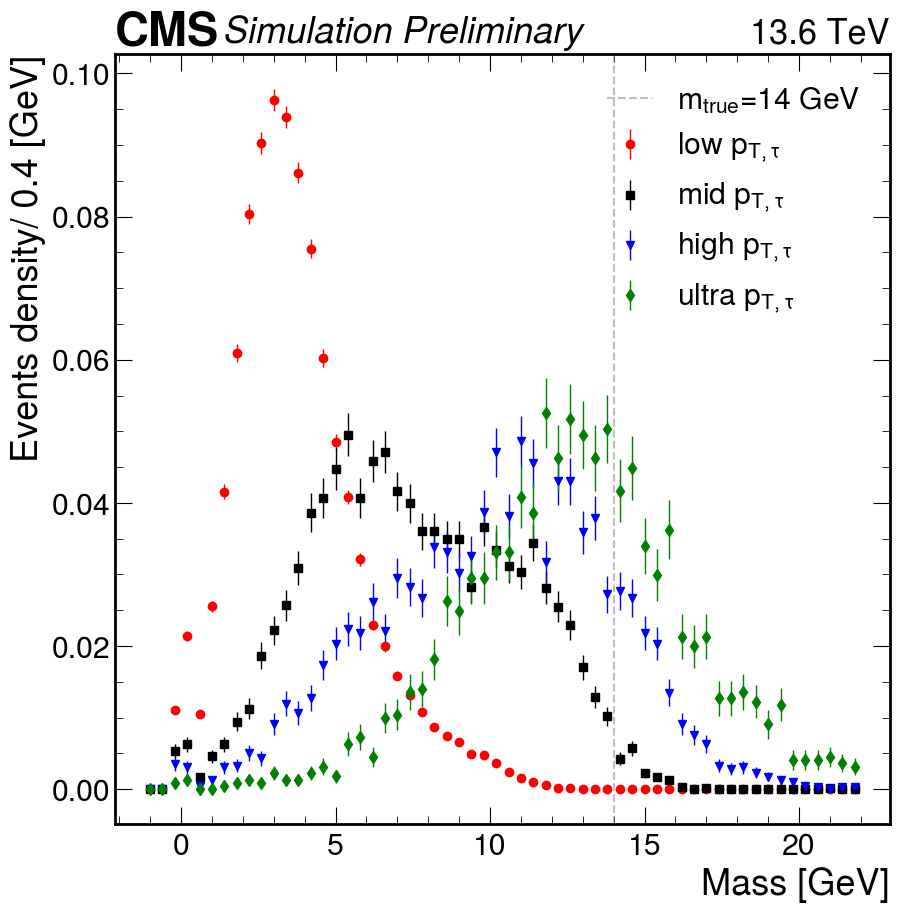

In [88]:
Mass = ['3p7', '14']
# Mass=Mass[1]
for Mass in Mass:
    data_file = f'../analysis_run3/mass_regression_test_data/upper_lower_streching_epoch_36_signal_mass_{Mass}_inference_data.pkl'
    # data_file = f'../analysis_run3/mass_regression_test_data/lower_streching_epoch_36_signal_mass_{Mass}_inference_data.pkl'
    # data_file = f'../analysis_run3/mass_regression_test_data/min_max_epoch_36_signal_mass_{Mass}_inference_data.pkl'
    infile = open(f"{data_file}", "rb")
    data = pickle.load(infile)
    print(f"loaded data file ------>  {data_file}")
    infile.close()

    m_true = {'3p7':3.7, '4':4, '6':6, '14':14}.get(Mass, None)
    m_pred = data["jet_mass"]
    jet_mass = data["jet_mass"]
    jet_pt = data["jet_pt"]

    mask1 = (jet_pt >=20) & (jet_pt <55)
    mask2 = (jet_pt >=55) & (jet_pt <70)
    mask3 = (jet_pt >=70) & (jet_pt <100)
    mask4 = jet_pt >=100

    m_pred1= m_pred[mask1]
    m_pred2= m_pred[mask2] 
    m_pred3= m_pred[mask3]
    m_pred4= m_pred[mask4]



    fig, ax = plt.subplots(figsize=(10,10), dpi=100)
    plt.axvline(m_true, linestyle='--', label=r"$m_{true}$" + f"={m_true} GeV", color='grey', alpha=0.5)

    # Define bin edges and centers
    bins = np.arange(m0_min, m0_max, bin_size)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])




    # Helper to plot histogram and error bars
    def plot_with_errors(data, label, color, error_bar):
        counts, _ = np.histogram(data, bins=bins)
        norm = np.sum(counts)
        counts_norm = counts / norm
        errors = np.sqrt(counts) / norm
        # plt.hist(data, bins=bins, histtype='step', label=label, color=color, density=True, linewidth=2)
        plt.errorbar(bin_centers, counts_norm, yerr=errors, fmt=error_bar, color=color, markersize=6, linewidth=1, label=label)

    # Plot each pt region
    plot_with_errors(m_pred1, r'low $p_{T,\tau}$', 'red', 'o')
    plot_with_errors(m_pred2, r'mid $p_{T,\tau}$', 'black', 's')
    plot_with_errors(m_pred3, r'high $p_{T,\tau}$', 'blue', 'v')
    plot_with_errors(m_pred4, r'ultra $p_{T,\tau}$', 'green', 'd')

    plt.xlabel('Mass [GeV]')
    plt.ylabel('Events density/ 0.4 [GeV]')
    plt.legend(loc='best')
    hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
    plt.show()


/tmp/ipykernel_54/2073725433.py:40: RuntimeWarning: invalid value encountered in divide
  ratio_err = ratio * np.sqrt((alt_err / alt)**2 + (ref_err / ref)**2)


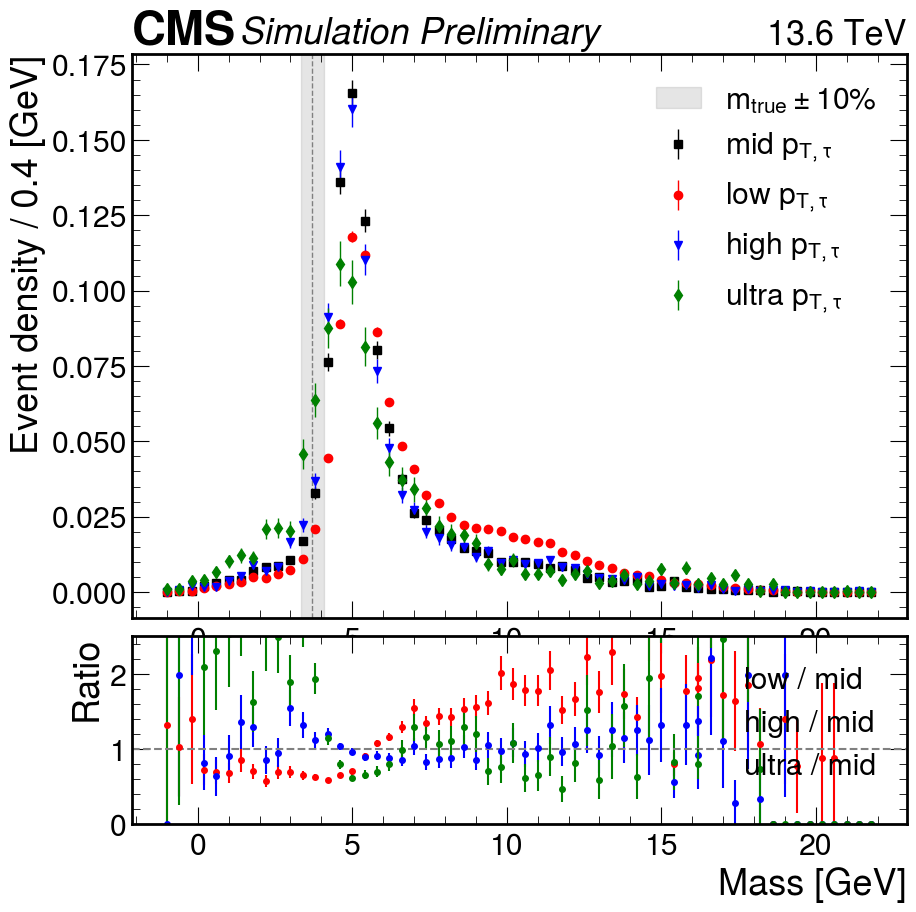

In [83]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10, 10), dpi=100)
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1], hspace=0.05)
ax_main = plt.subplot(gs[0])
ax_ratio = plt.subplot(gs[1], sharex=ax_main)

# Vertical shaded band ±10% around m_true
band_width = 0.1 * m_true
ax_main.axvspan(m_true - band_width, m_true + band_width, color='grey', alpha=0.2, label=r"$m_{true} \pm 10\%$")

# Vertical line at m_true
ax_main.axvline(m_true, linestyle='--', color='grey', linewidth=1)

bins = np.arange(m0_min, m0_max, bin_size)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Helper
def plot_with_errors(ax, data, label, color, fmt):
    counts, _ = np.histogram(data, bins=bins)
    norm = np.sum(counts)
    counts_norm = counts / norm
    errors = np.sqrt(counts) / norm
    ax.errorbar(bin_centers, counts_norm, yerr=errors, fmt=fmt, color=color, markersize=6, linewidth=1, label=label)
    return counts_norm, errors

# Main plot
ref_counts, ref_errors = plot_with_errors(ax_main, m_pred2, r'mid $p_{T,\tau}$', 'black', 's')
alt1_counts, alt1_errors = plot_with_errors(ax_main, m_pred1, r'low $p_{T,\tau}$', 'red', 'o')
alt2_counts, alt2_errors = plot_with_errors(ax_main, m_pred3, r'high $p_{T,\tau}$', 'blue', 'v')
alt3_counts, alt3_errors = plot_with_errors(ax_main, m_pred4, r'ultra $p_{T,\tau}$', 'green', 'd')

ax_main.set_ylabel('Event density / 0.4 [GeV]')
ax_main.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax_main)

# Ratio plot helper
def plot_ratio(ax, ref, ref_err, alt, alt_err, color, label):
    ratio = np.divide(alt, ref, out=np.zeros_like(alt), where=ref!=0)
    ratio_err = ratio * np.sqrt((alt_err / alt)**2 + (ref_err / ref)**2)
    ax.errorbar(bin_centers, ratio, yerr=ratio_err, fmt='o', color=color, markersize=4, label=label)

plot_ratio(ax_ratio, ref_counts, ref_errors, alt1_counts, alt1_errors, 'red', 'low / mid')
plot_ratio(ax_ratio, ref_counts, ref_errors, alt2_counts, alt2_errors, 'blue', 'high / mid')
plot_ratio(ax_ratio, ref_counts, ref_errors, alt3_counts, alt3_errors, 'green', 'ultra / mid')

ax_ratio.axhline(1.0, linestyle='--', color='grey')
ax_ratio.set_xlabel('Mass [GeV]')
ax_ratio.set_ylabel('Ratio')
ax_ratio.set_ylim(0.0, 2.5)
ax_ratio.legend(loc='upper right')

# plt.setp(ax_main.get_xticklabels(), visible=False)
plt.show()
